## VACCINE CLASSIFICATION PROJECT

In [74]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import precision_score,classification_report, auc, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, roc_curve, precision_score



## Business understanding

The business problem outlined in the context of the dataset is related to public health efforts in the context of the COVID-19 pandemic. Specifically, the challenge is to predict whether individuals received the H1N1 flu vaccine or the seasonal flu vaccine based on data collected in the National 2009 H1N1 Flu Survey.

The importance of this prediction task lies in understanding the factors and patterns associated with individuals' vaccination decisions. By identifying the demographic, opinion, and health behavior variables that correlate with vaccine uptake, public health authorities can gain insights that may inform future vaccination campaigns. This information can help guide strategies to improve vaccination rates, tailor communication efforts, and address specific concerns or barriers that certain groups may have regarding flu vaccination.

This insight can be valuable for public health officials and policymakers in developing targeted and effective strategies to increase vaccination coverage and mitigate the impact of flu outbreaks.

## TARGET EXPLORATION

In [75]:
df_t = pd.read_csv("../data/training_set_labels.csv")
df_t

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


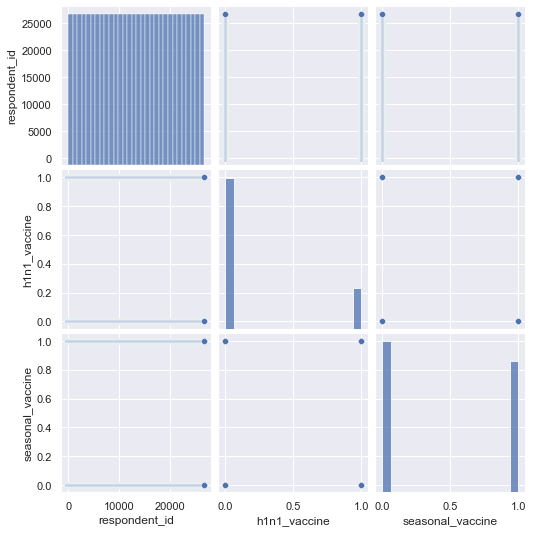

In [76]:
# target visualisation with pairplot
sns.pairplot(df_t)

In [77]:
df_t['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [78]:
df_t['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

## Features Exploration

In [79]:
#Reading the dataset 

df_f = pd.read_csv("../data/training_set_features.csv")
df_f

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [80]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [81]:
df_f.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [82]:
df_f.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [83]:
# Get a list of column names with dtype 'object'
object_columns = df_f.select_dtypes(include=['object']).columns.tolist()

df_f_obj = df_f[object_columns]
df_f_obj

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


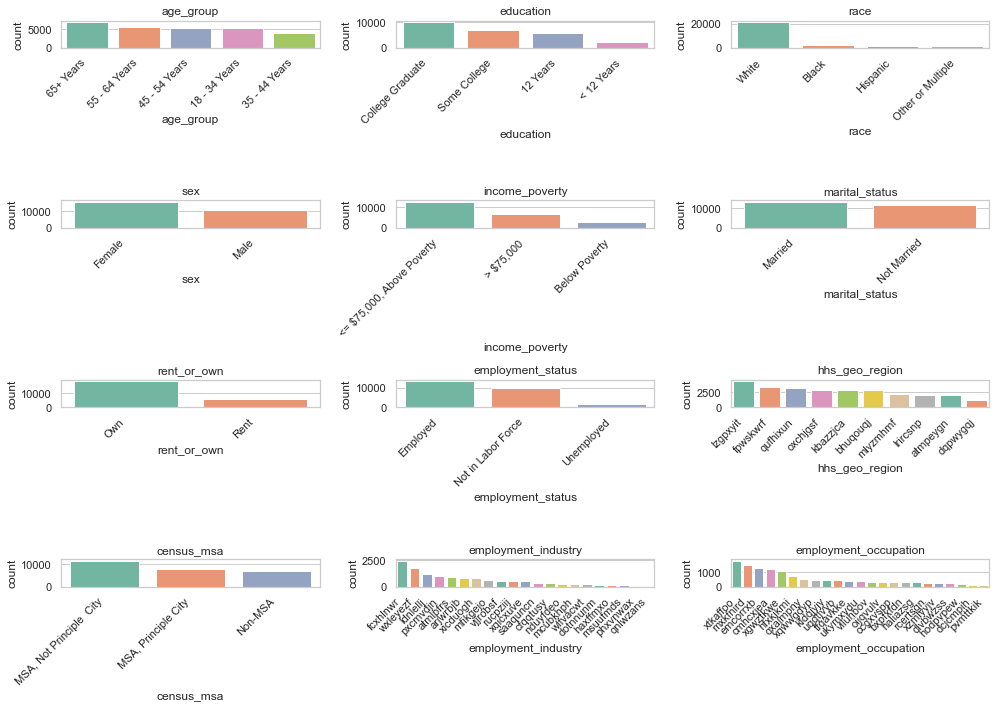

In [84]:


sns.set(style="whitegrid")

# Plotting using countplot
plt.figure(figsize=(14, 10))
for i, column in enumerate(df_f_obj.columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=column, data=df_f_obj, palette="Set2", order= df_f_obj[column].value_counts().index)
    plt.title(column)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

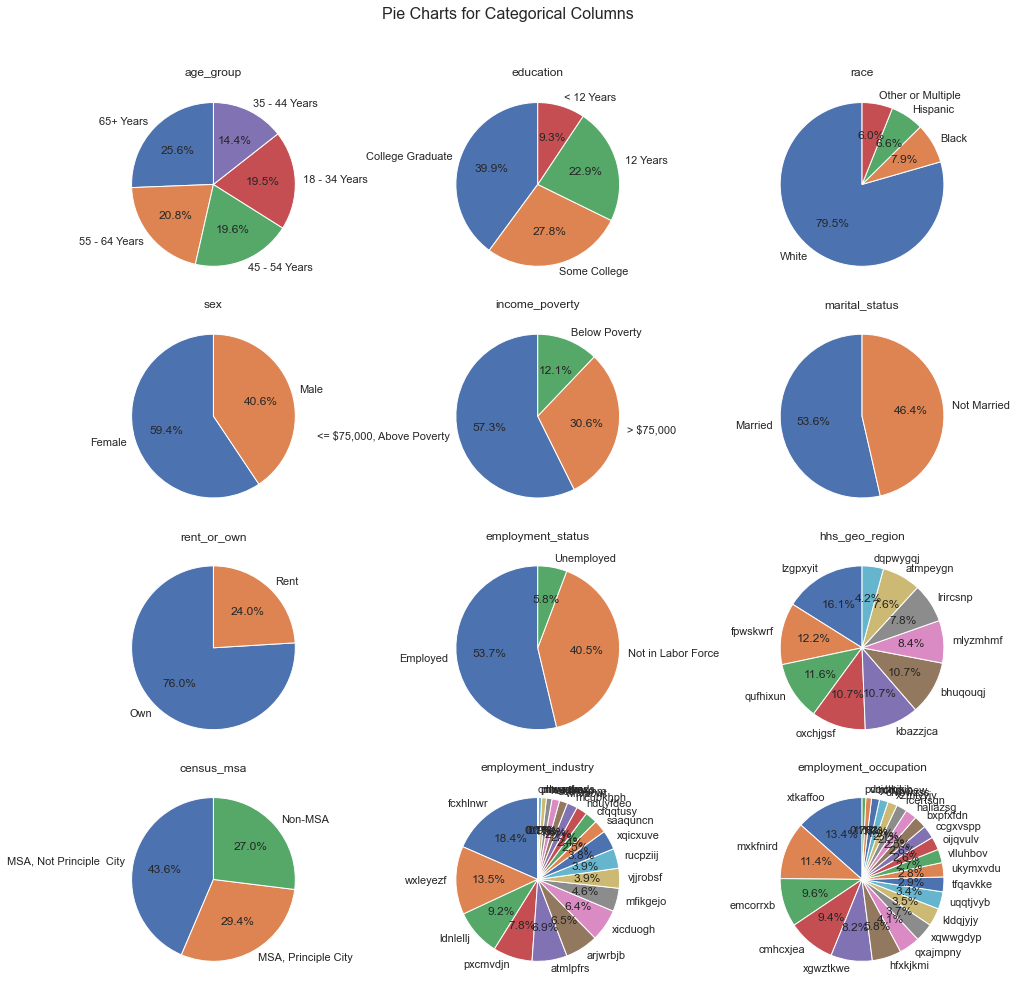

In [85]:
# Set up subplots for pie charts
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
fig.suptitle('Pie Charts for Categorical Columns', fontsize=16)

# Plotting using pie charts
for i, column in enumerate(df_f_obj.columns):
    ax = axes[i // 3, i % 3]
    ax.pie(df_f_obj[column].value_counts(), labels=df_f_obj[column].value_counts().index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

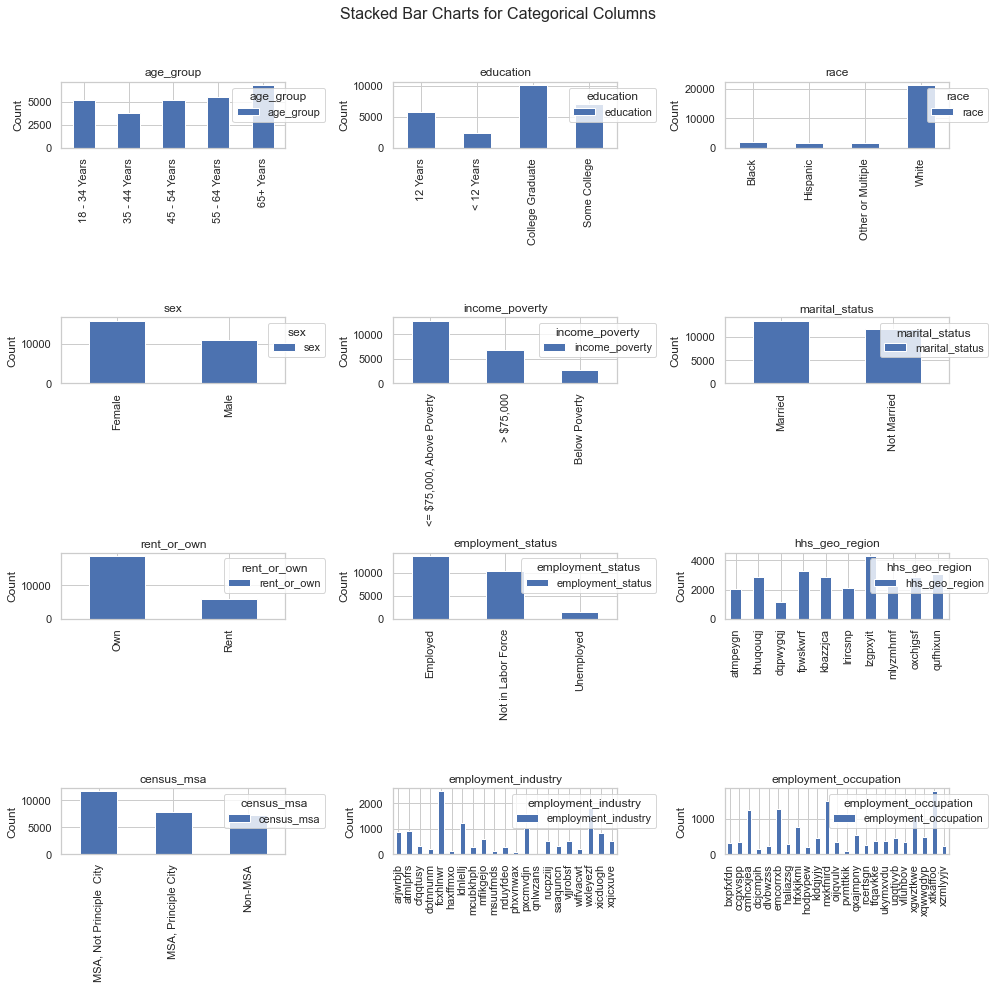

In [86]:
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
fig.suptitle('Stacked Bar Charts for Categorical Columns', fontsize=16)

# Plotting using stacked bar charts
for i, column in enumerate(df_f_obj.columns):
    ax = axes[i // 3, i % 3]
    df_f_obj[column].value_counts().sort_index().plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Count')
    ax.legend(title=column, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

In [87]:
# Get a list of column names with dtype 'category' and 'object'
num_cat = df_f.select_dtypes(exclude=['object']).columns.tolist()

df_f_num = df_f[num_cat]
df_f_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

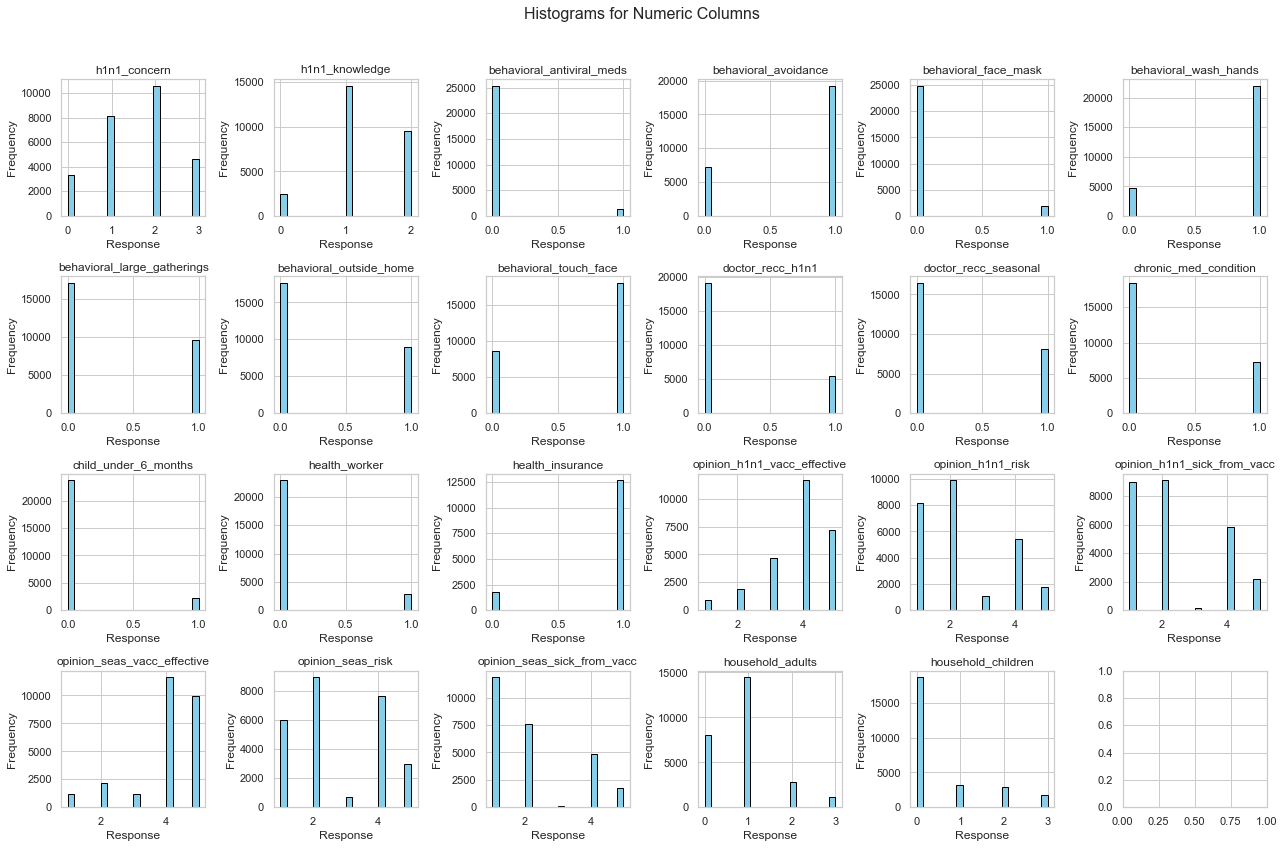

In [88]:
# Set up subplots for histograms
fig, axes = plt.subplots(4, 6, figsize=(18, 12))
fig.suptitle('Histograms for Numeric Columns', fontsize=16)

# Plotting histograms
for i, column in enumerate(df_f_num.columns[1:]):
    ax = axes[i // 6, i % 6]
    df_f_num[column].plot(kind='hist', ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Response')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

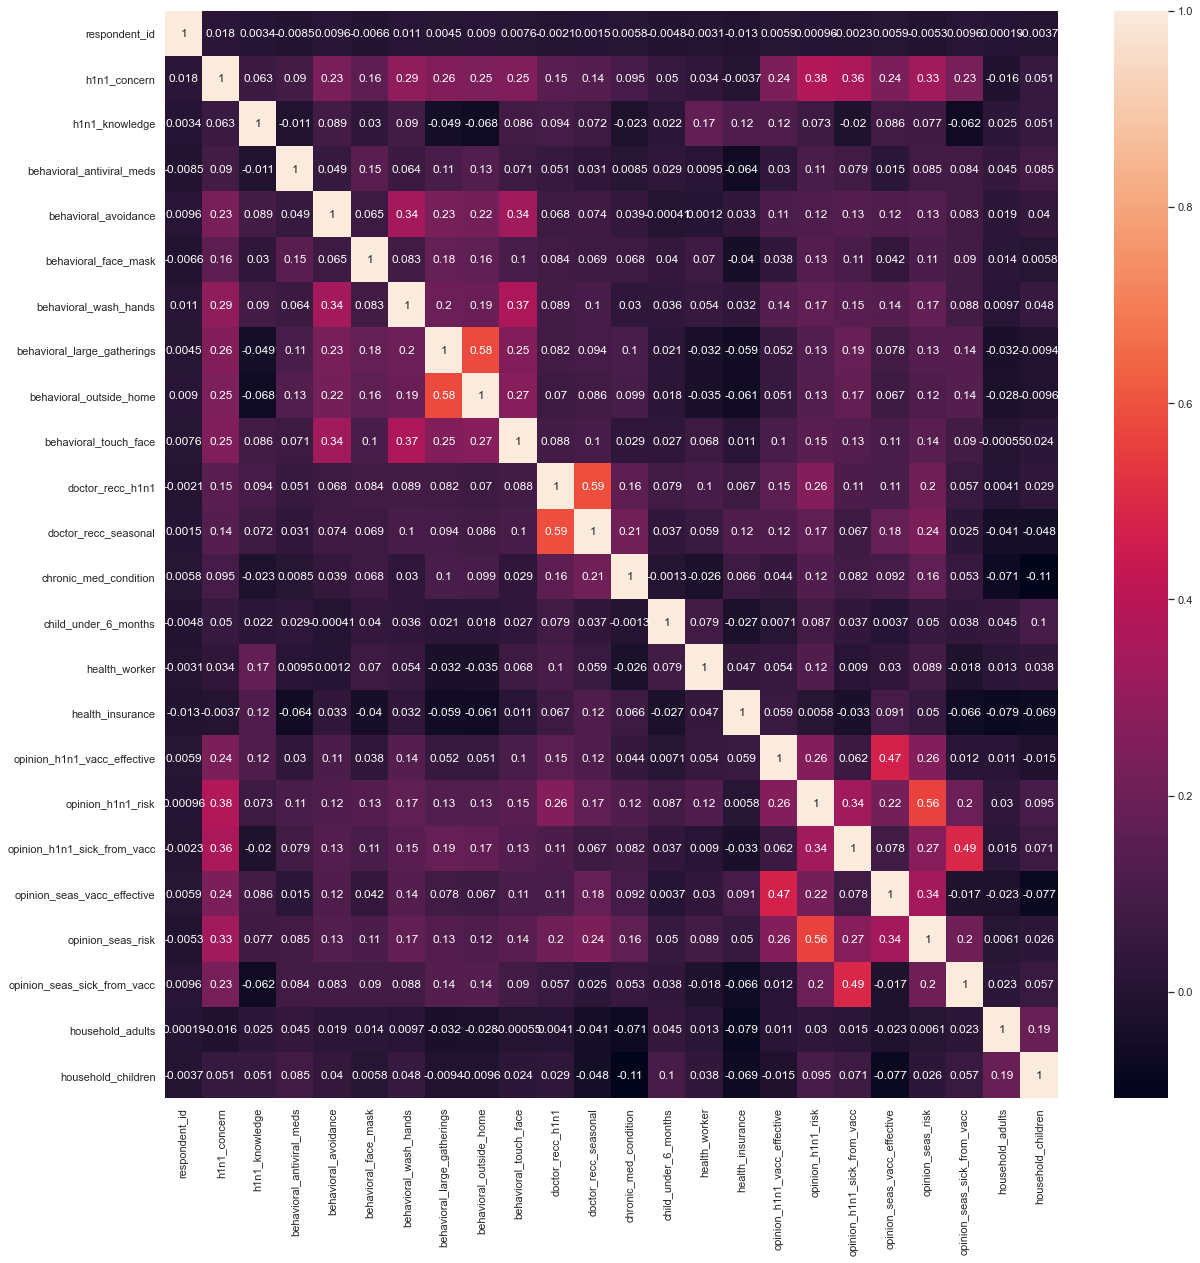

In [89]:
#correlation visualisation for 


sns.set(rc={'figure.figsize':(20, 20)})

# Use the .heatmap function to depict the relationships visually!
sns.heatmap(df_f.corr(), annot=True);

In [90]:
for column in df_f_num.drop(columns='respondent_id'):
    print(f"Column: {column}")
    print(df_f_num[column].value_counts())
    print()

Column: h1n1_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

Column: h1n1_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

Column: behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

Column: behavioral_avoidance
1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64

Column: behavioral_face_mask
0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

Column: behavioral_wash_hands
1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64

Column: behavioral_large_gatherings
0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

Column: behavioral_outside_home
0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64

Column: behavioral_touch_face
1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64

Column: doctor_recc_h1n1
0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: 

In [91]:
df_full_n = df_f_num.merge(df_t, on='respondent_id', how='inner')

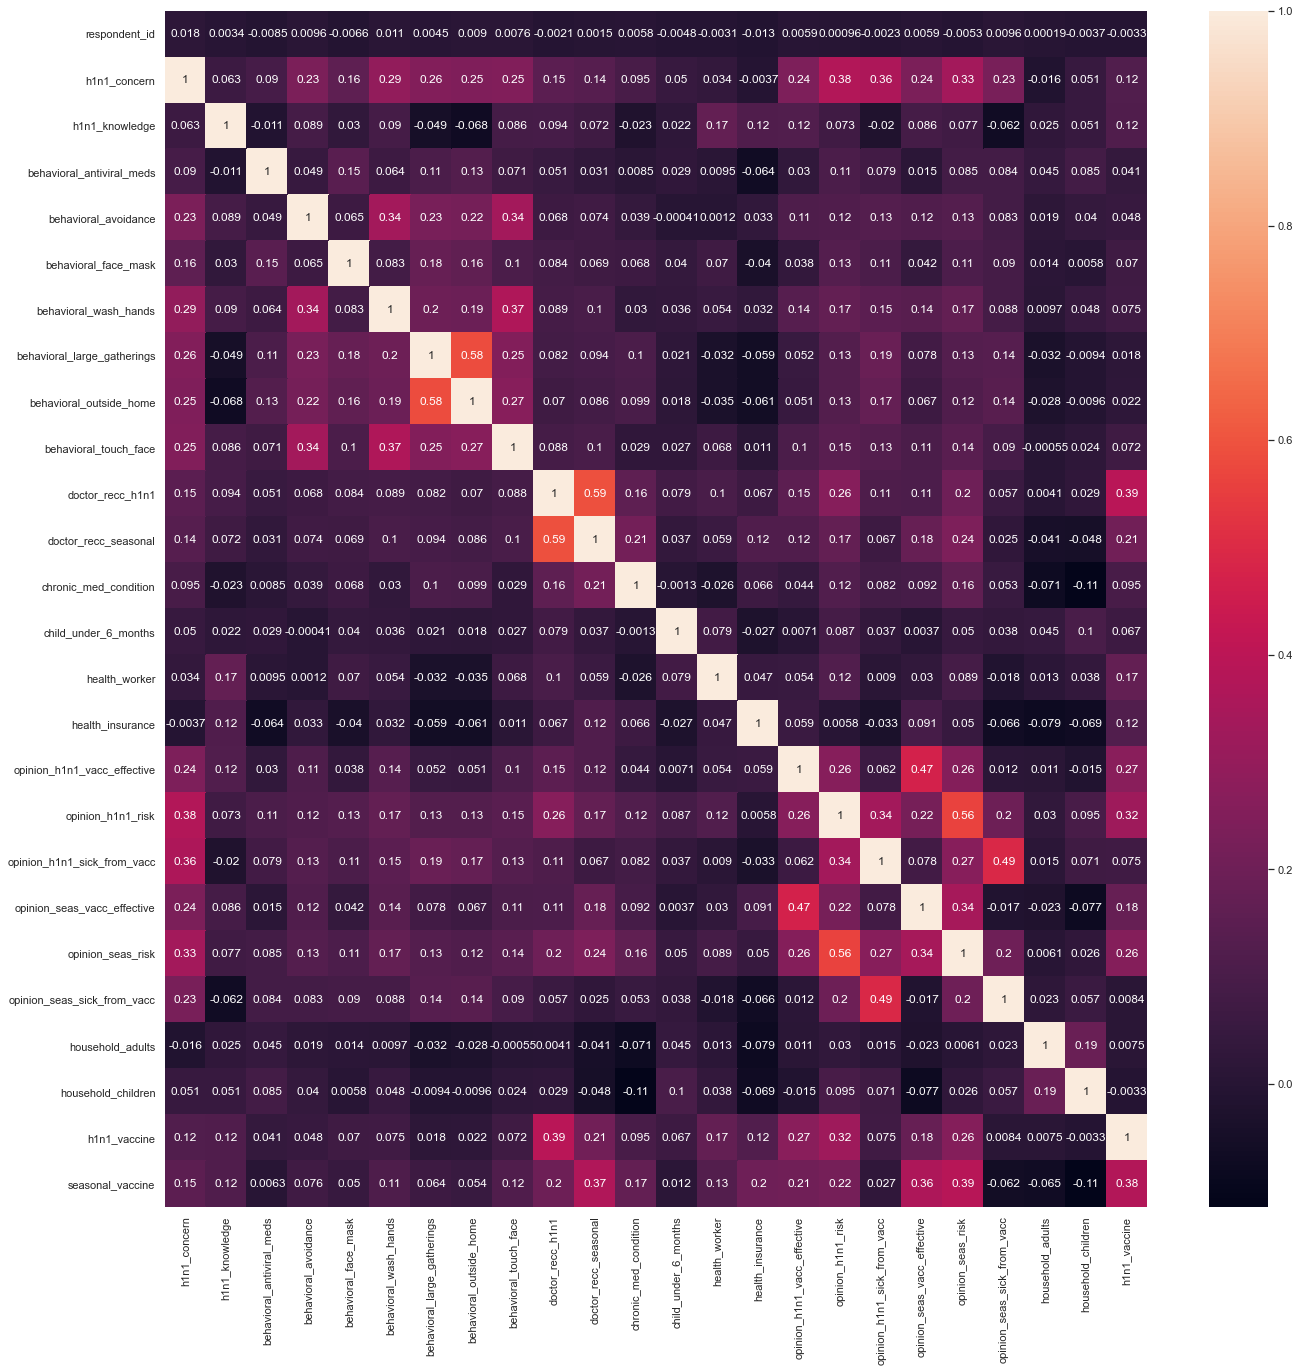

In [92]:
# visualization of the correlation with the target
sns.set(rc={'figure.figsize':(22, 22)})

sns.heatmap(df_full_n.corr().drop(columns=['respondent_id', 'seasonal_vaccine']), annot=True);

In [93]:
df_f_obj


,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [94]:
df_full_obj =pd.concat([df_f_obj, df_t], ignore_index=True)

In [95]:
df_full_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              26707 non-null  object 
 1   education              25300 non-null  object 
 2   race                   26707 non-null  object 
 3   sex                    26707 non-null  object 
 4   income_poverty         22284 non-null  object 
 5   marital_status         25299 non-null  object 
 6   rent_or_own            24665 non-null  object 
 7   employment_status      25244 non-null  object 
 8   hhs_geo_region         26707 non-null  object 
 9   census_msa             26707 non-null  object 
 10  employment_industry    13377 non-null  object 
 11  employment_occupation  13237 non-null  object 
 12  respondent_id          26707 non-null  float64
 13  h1n1_vaccine           26707 non-null  float64
 14  seasonal_vaccine       26707 non-null  float64
dtypes:

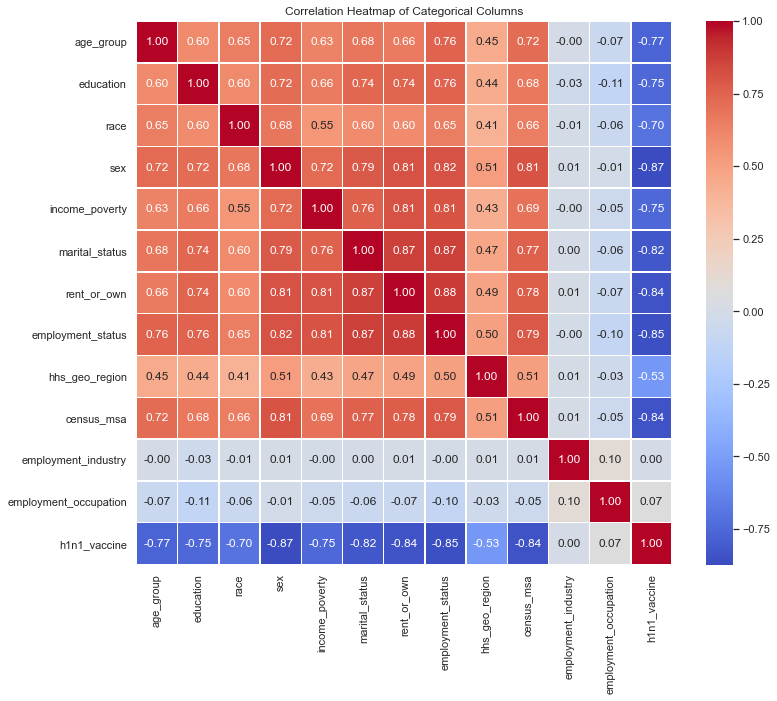

In [96]:
df_f_cat = df_full_obj.astype(str).drop(columns=['respondent_id','seasonal_vaccine'])

# Encode categorical columns
label_encoder = LabelEncoder()
df_encoded = df_f_cat.apply(label_encoder.fit_transform)

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Categorical Columns')
plt.show()

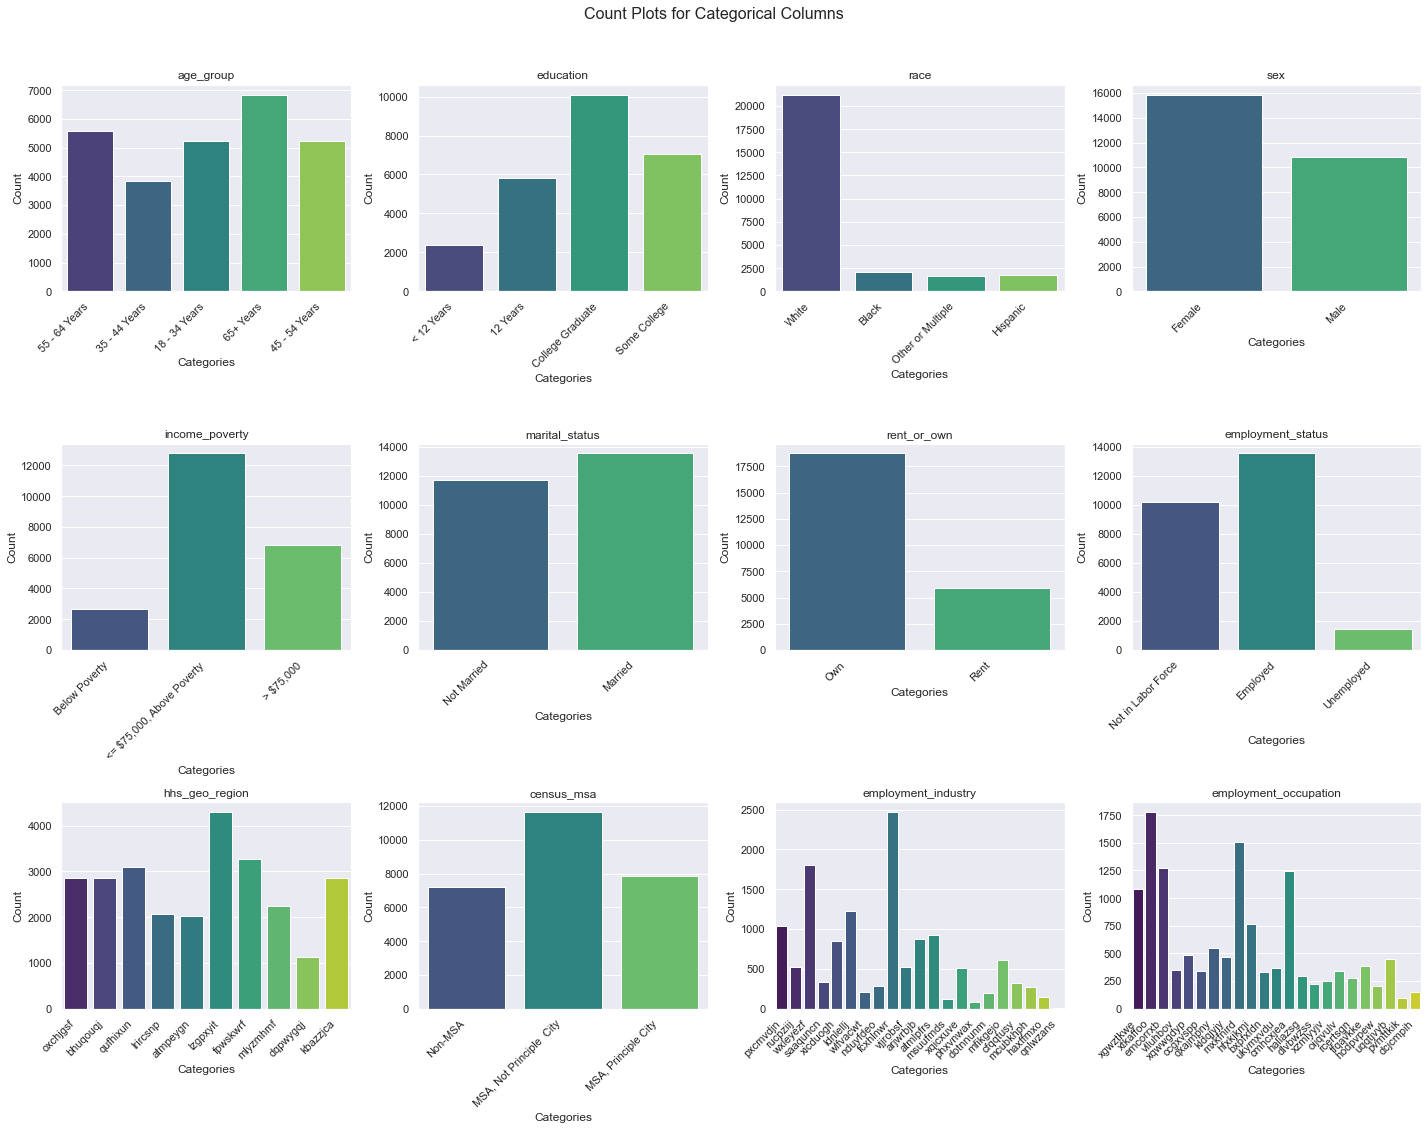

In [97]:
# Set up subplots for count plots
fig, axes = plt.subplots(3, 4, figsize=(20, 16))
fig.suptitle('Count Plots for Categorical Columns', fontsize=16)

# Plot count plots for each column
for i, column in enumerate(df_full_obj.columns[:-3]):
    ax = axes[i // 4, i % 4]
    sns.countplot(x=column, data=df_full_obj, ax=ax, palette='viridis')
    ax.set_title(column)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

# Determine how you will handle null values
Impute values, drop rows or columns etc…
Take a look at the different types/strategies of imputers (KNNI is powerful but slow)

# Determine how you will handle categorical variables
Binary?
Ordinal or One-Hot encode?


# Will you need to scale the numeric data?

In [98]:
# Lets split the data

In [99]:
#columns_f= ['age_group', 'education', 'race','sex','income_poverty', 'marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa']
#X = df_f[columns_f]
X = df_f
y = df_t["h1n1_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [100]:
y.value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

# Lets build our Dummy model 

In [101]:
#
dummy_model = DummyClassifier(strategy='most_frequent')
#
dummy_model.fit(X_train, y_train)
#
dummy_model.predict(X_train)
#Accuracy score
print ('This is the accuracy score:', dummy_model.score(X_train, y_train))

This is the accuracy score: 0.7874687968047928


## Model Evaluation

In [102]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results.mean()

0.7874687968047928

The mean accuracy is a little under 79% if we always guess the majority class.

In [103]:
class mcalculation():
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        self.precision_results = None  # New attribute for precision
        self.precision_mean = None
        self.precision_median = None
        self.precision_std = None
        #
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.

        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''

        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Accuracy scores
        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        # Precision scores
        y_pred = cross_val_predict(self.model, cv_X, cv_y, cv=kfolds)
        self.precision_results = [precision_score(cv_y, y_pred)]
        self.precision_mean = np.mean(self.precision_results)
        self.precision_median = np.median(self.precision_results)
        self.precision_std = np.std(self.precision_results)

    def print_cv_summary(self):
        cv_summary = (
            f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
            {self.precision_mean:.5f} ± {self.precision_std:.5f} precision
        ''')
        print(cv_summary)

    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
            y=self.cv_results,
            color='orange',
            size=10,
            alpha=0.8,
            ax=ax
        )

        return ax

/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV Results for `dummy` model:
            0.78747 ± 0.00023 accuracy
            0.00000 ± 0.00000 precision
        


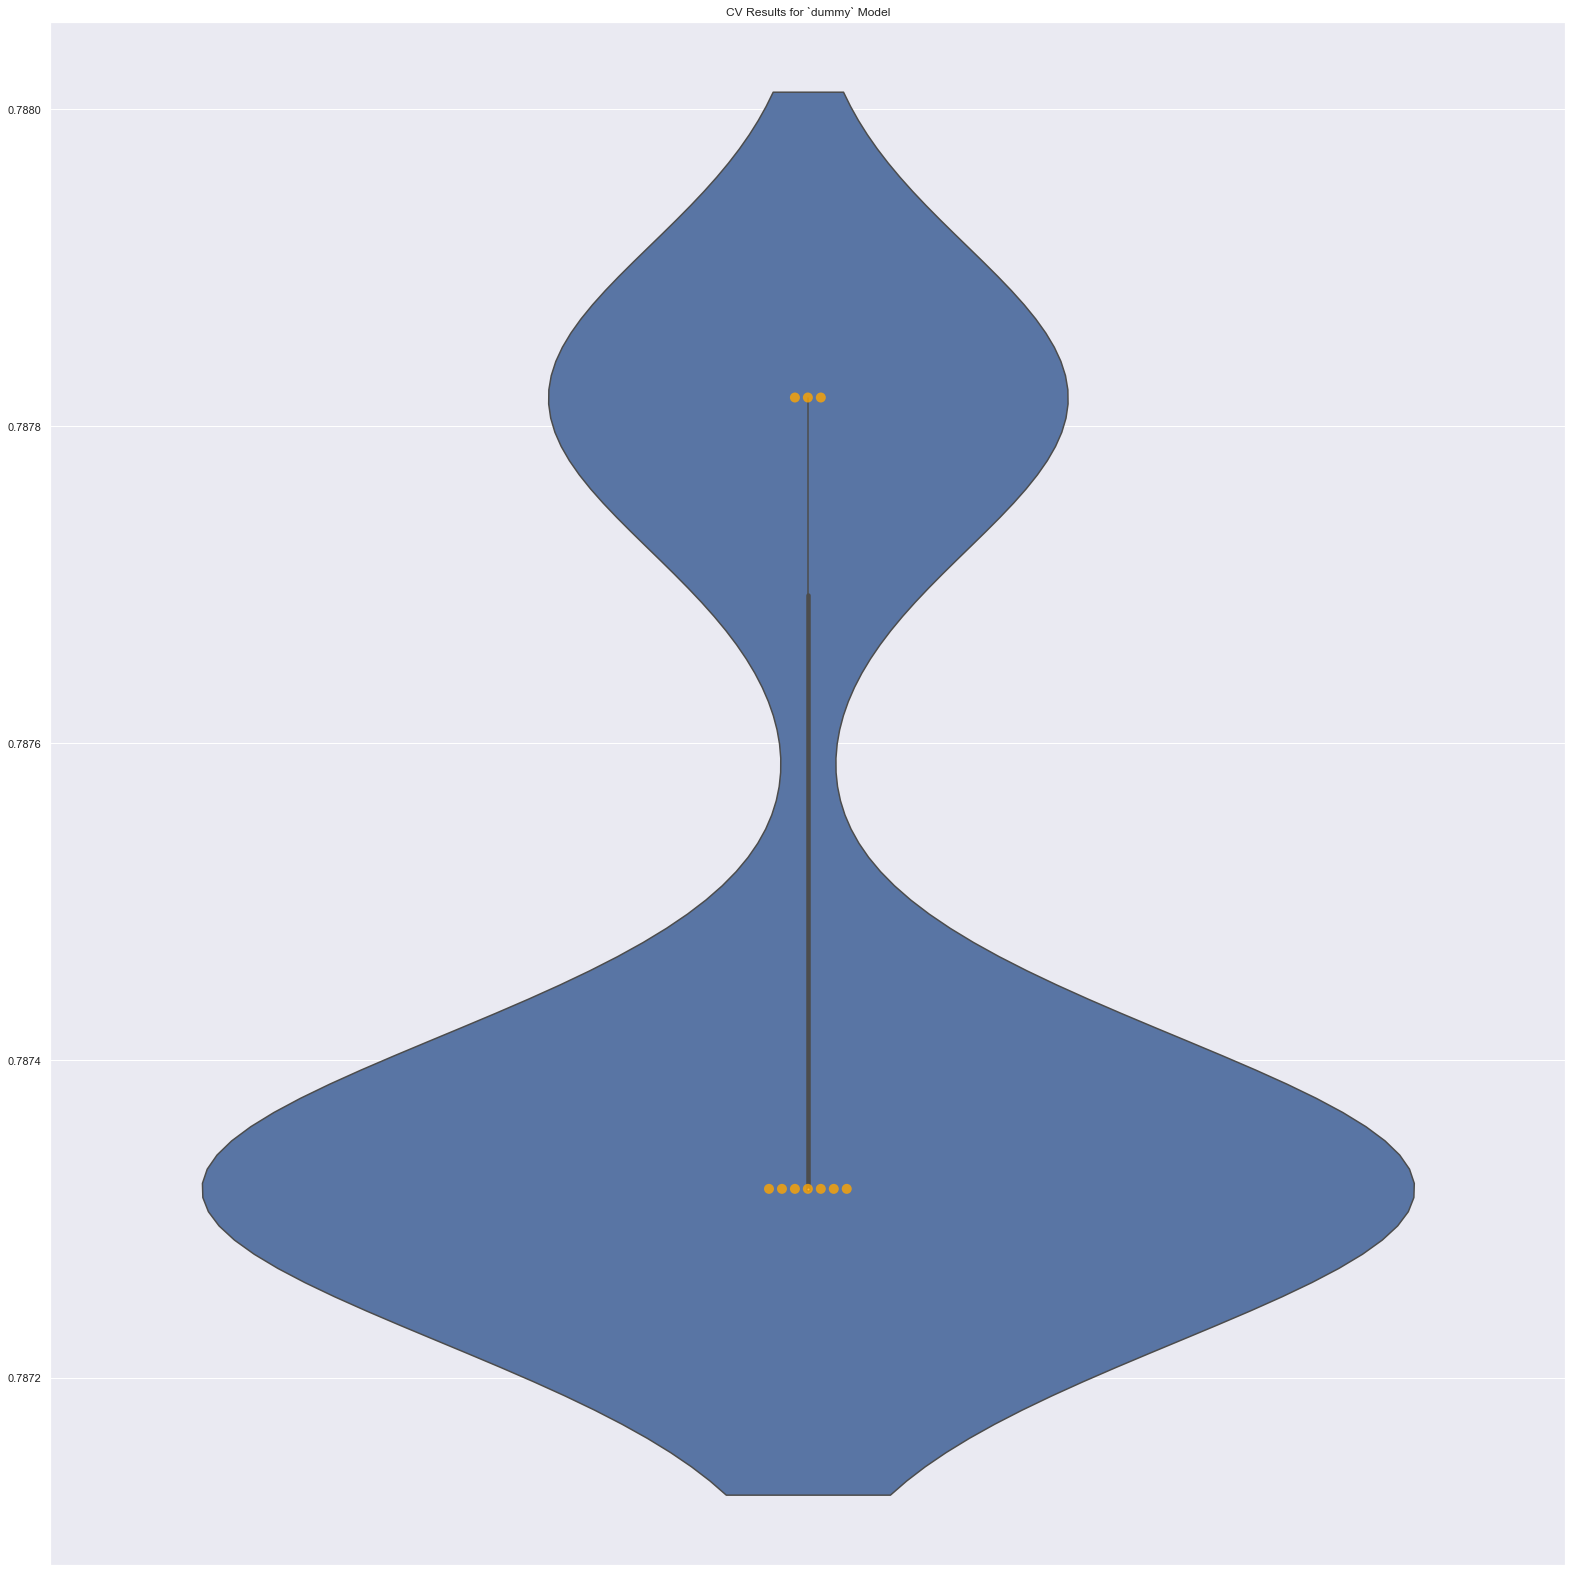

In [104]:
dummy_model_results = mcalculation(
                        model=dummy_model,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train
);

#Dummy model accuracy score and precision score
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();
dummy_model_results.print_cv_summary()

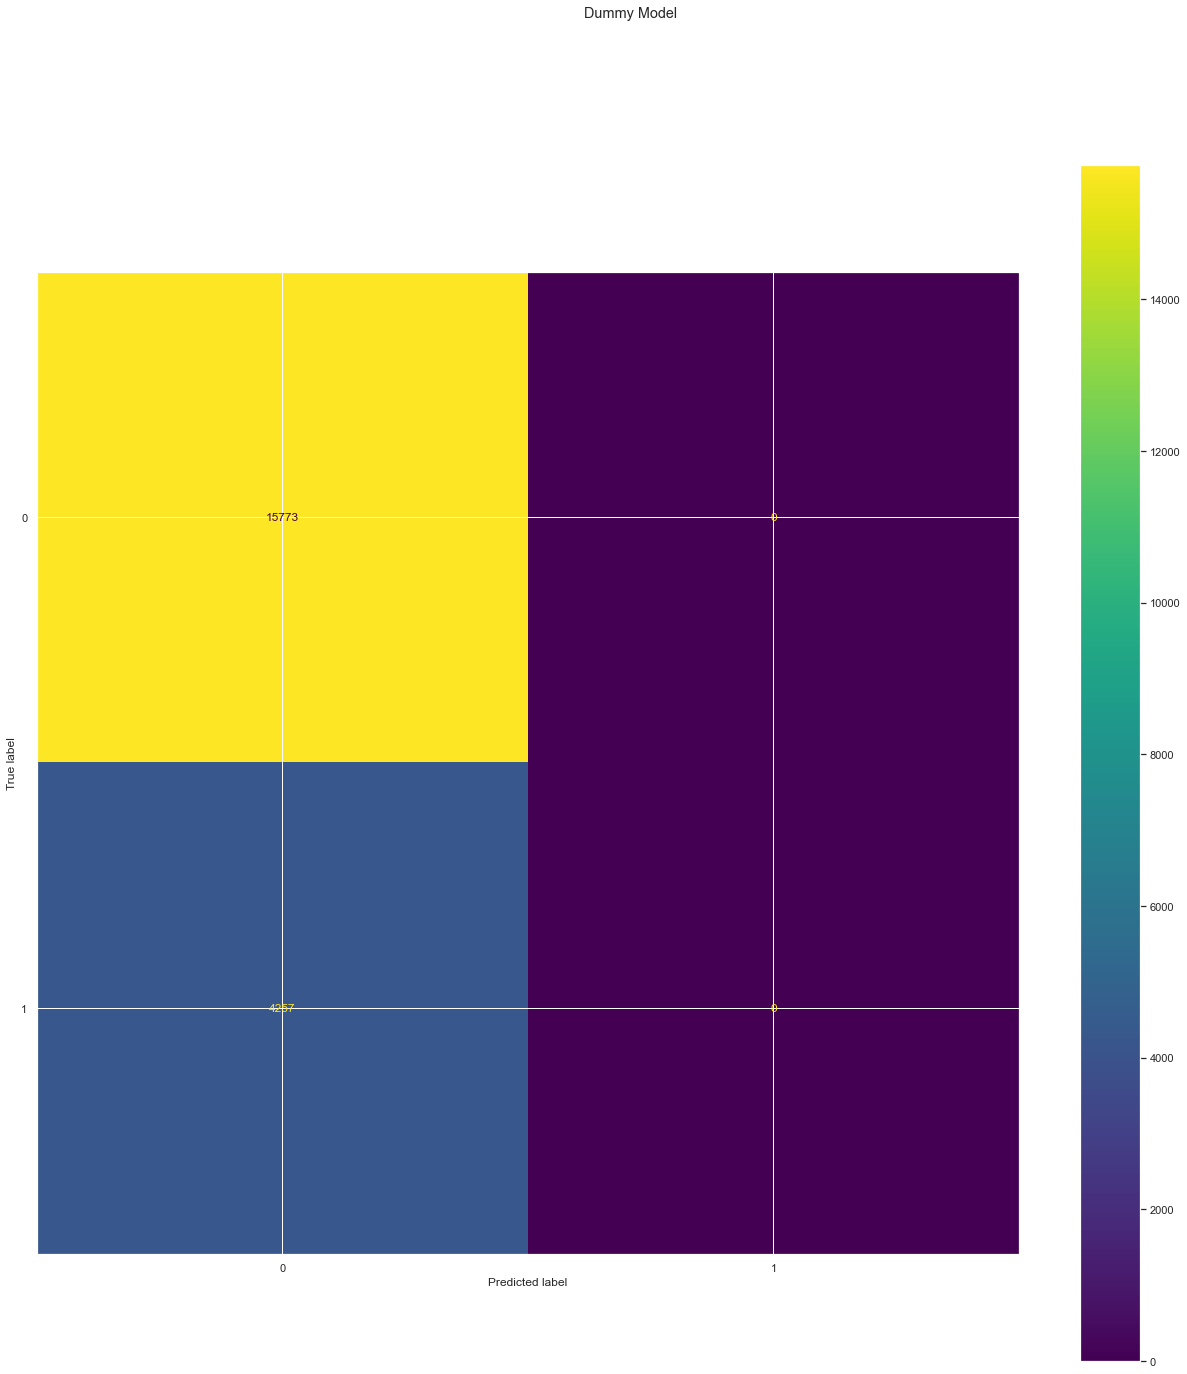

In [105]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

ConfusionMatrixDisplay(confusion_matrix(y_train, dummy_model.predict(X_train))).plot(ax=ax);

# Imputers
num_imp = SimpleImputer(add_indicator=True)
cat_imp = SimpleImputer(strategy='constant', fill_value='Unknown', add_indicator=True)

# Pipelines
num_pipeline = Pipeline(steps=[('impute_nummerical', num_imp)])

cat_pipeline = Pipeline(steps=[
    ('impute_cat', cat_imp),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))])

col_tr = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, df_f_num),
                                        ('cat', cat_pipeline, columns_f)],
                          remainder='passthrough', sparse_threshold=0)


col_tr = ColumnTransformer(
    transformers=[
        ('name_of_step', Transformer(), ['column1', 'column2']),
        # add more transformers as needed
    ],
    remainder='passthrough'  # or 'drop' or a transformer for remaining columns
)

list(df_f_num)

#Lets transform X_train and X_test
col_tr.fit_transform(X_train)


## Model With numerical features only Without SMOTE- Decision tree- Logistic Regression

In [106]:
 
# Combine dataframes
#c_df = pd.concat([df_f, df_t], axis=0, ignore_index=True)

# Drop the "respondent_id" column
#c_df = c_df.drop(columns=["respondent_id", 'seasonal_vaccine'])
#c_df.dropna()
#c_df

In [107]:
#num_col = c_df.columns[c_df.dtypes != 'object'].values
#num_col

In [108]:
num_col = df_f.columns[df_f.dtypes != 'object'].values
num_col.shape

(24,)

In [109]:
#X= c_df[num_col].drop('h1n1_vaccine', axis=1)
#y = c_df['h1n1_vaccine']
X = df_f[num_col].drop('respondent_id', axis=1)
y = df_t['h1n1_vaccine']
#splitting the data, preparing the test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state=42)

In [110]:
X.columns



Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [111]:
df_f_cat.columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation',
       'h1n1_vaccine'],
      dtype='object')

In [112]:
# Instantiate SimpleImputer 
imputer = SimpleImputer(strategy="median") 
std_scaler = StandardScaler()
# transforming and scaling X_train
X_train_filled = imputer.fit_transform(X_train)
X_train_scaled = std_scaler.fit_transform(X_train_filled)

# ------- Decision Tree

In [113]:
#Using Decision Tree Classifier 
# Define the classifier (predictor) to train
rf_clf = DecisionTreeClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [114]:
#rf_clf.score(X_train_scaled, y_train) 

In [115]:
X_test_filled = imputer.transform(X_test)
X_test_scaled = std_scaler.transform(X_test_filled)

In [116]:
y_pred = rf_clf.predict(X_test_scaled)


In [117]:
#rf_clf.score(X_test_scaled, y_test)

In [118]:
#precision = precision_score(y_train, y_pred_train_encoded, average='binary') 

In [119]:
#rf_clf.predict_proba(X_test_scaled, check_input=True).mean()

CV Results for `numeric model without SMOTE` model:
            0.75187 ± 0.00702 accuracy
            0.42156 ± 0.00000 precision
        


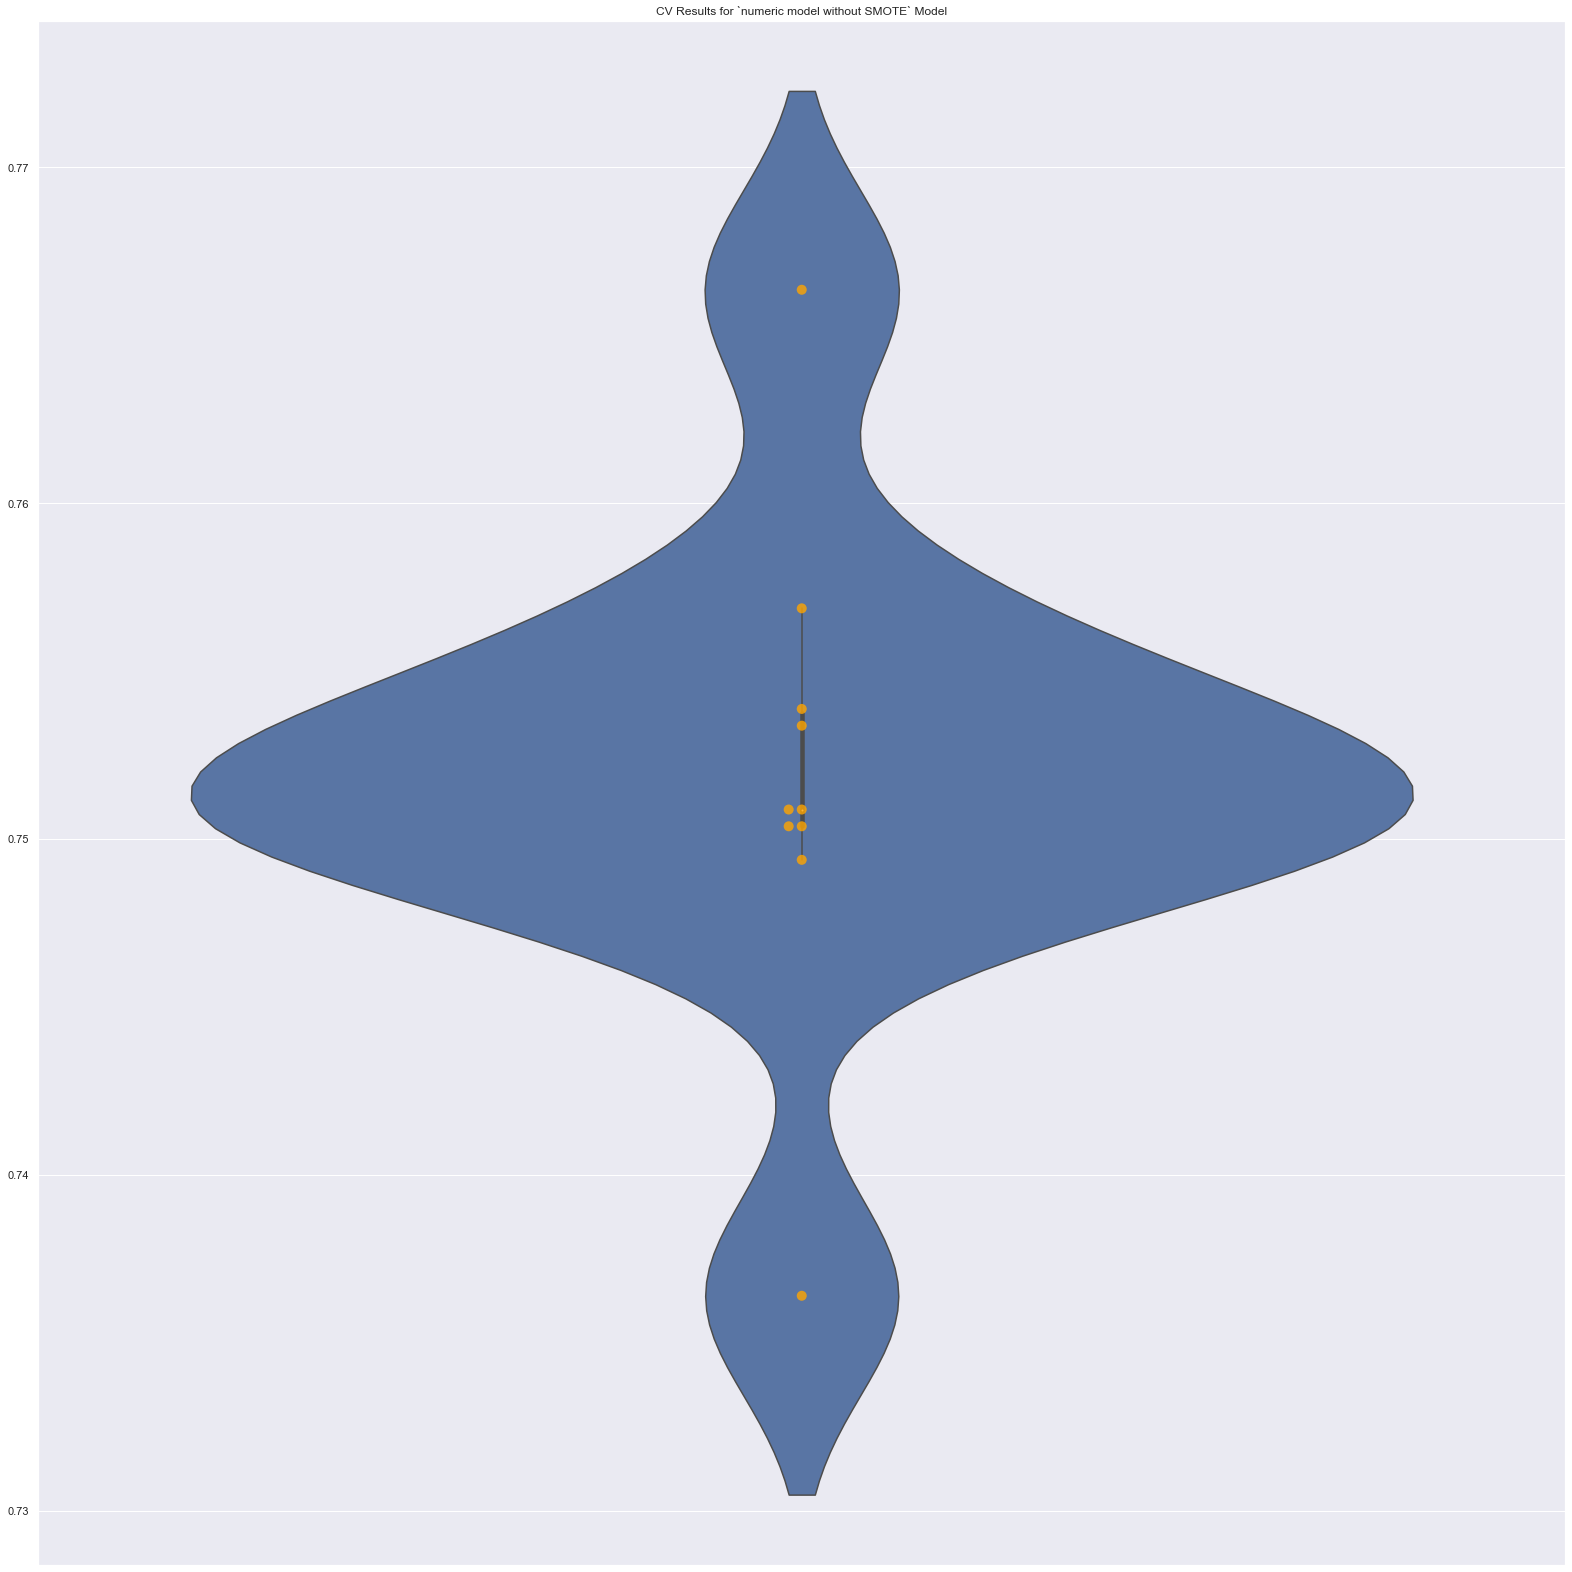

In [120]:
num_model_results = mcalculation(
                        model=rf_clf,
                        model_name='numeric model without SMOTE',
                        X=X_train_scaled, 
                        y=y_train
);
num_model_results.print_cv_summary()



#Decision tree model accuracy score and precision score
fig, ax = plt.subplots()

ax = num_model_results.plot_cv(ax)
plt.tight_layout();


In [121]:
def evaluate_model_performance(model, X_train_scaled, y_train, X_test_scaled, y_test):
    # Calculate roc-auc for test set
    test_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probs)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Print AUC for the test set
    print('\nAUC for Test Set is: {:.2f}'.format(roc_auc_test))

    # Calculate roc-auc for train set
    train_probs = model.predict_proba(X_train_scaled)[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probs)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Print AUC for the train set
    print('\nAUC for Train Set is: {:.2f}'.format(roc_auc_train))

    # Plot ROC curves
    plt.figure(figsize=(12, 6))

    # Plot ROC curve for test set
    plt.subplot(1, 2, 1)
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Test Set')
    plt.legend(loc='lower right')

    # Plot ROC curve for train set
    plt.subplot(1, 2, 2)
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Train Set')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    # Create and print a confusion matrix
    print('\nConfusion Matrix')
    print('----------------')
    y_pred = model.predict(X_test_scaled)
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print(confusion_matrix)




AUC for Test Set is: 0.65

AUC for Train Set is: 1.00


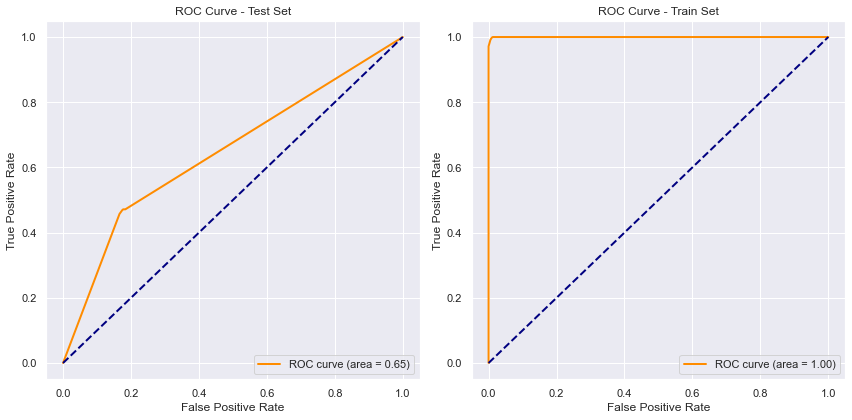


Confusion Matrix
----------------
Predicted     0     1   All
True                       
0          4386   874  5260
1           769   648  1417
All        5155  1522  6677


In [122]:
evaluate_model_performance(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test)

CV Results for `numeric model without SMOTE` model:
            0.75187 ± 0.00702 accuracy
            0.42156 ± 0.00000 precision
        


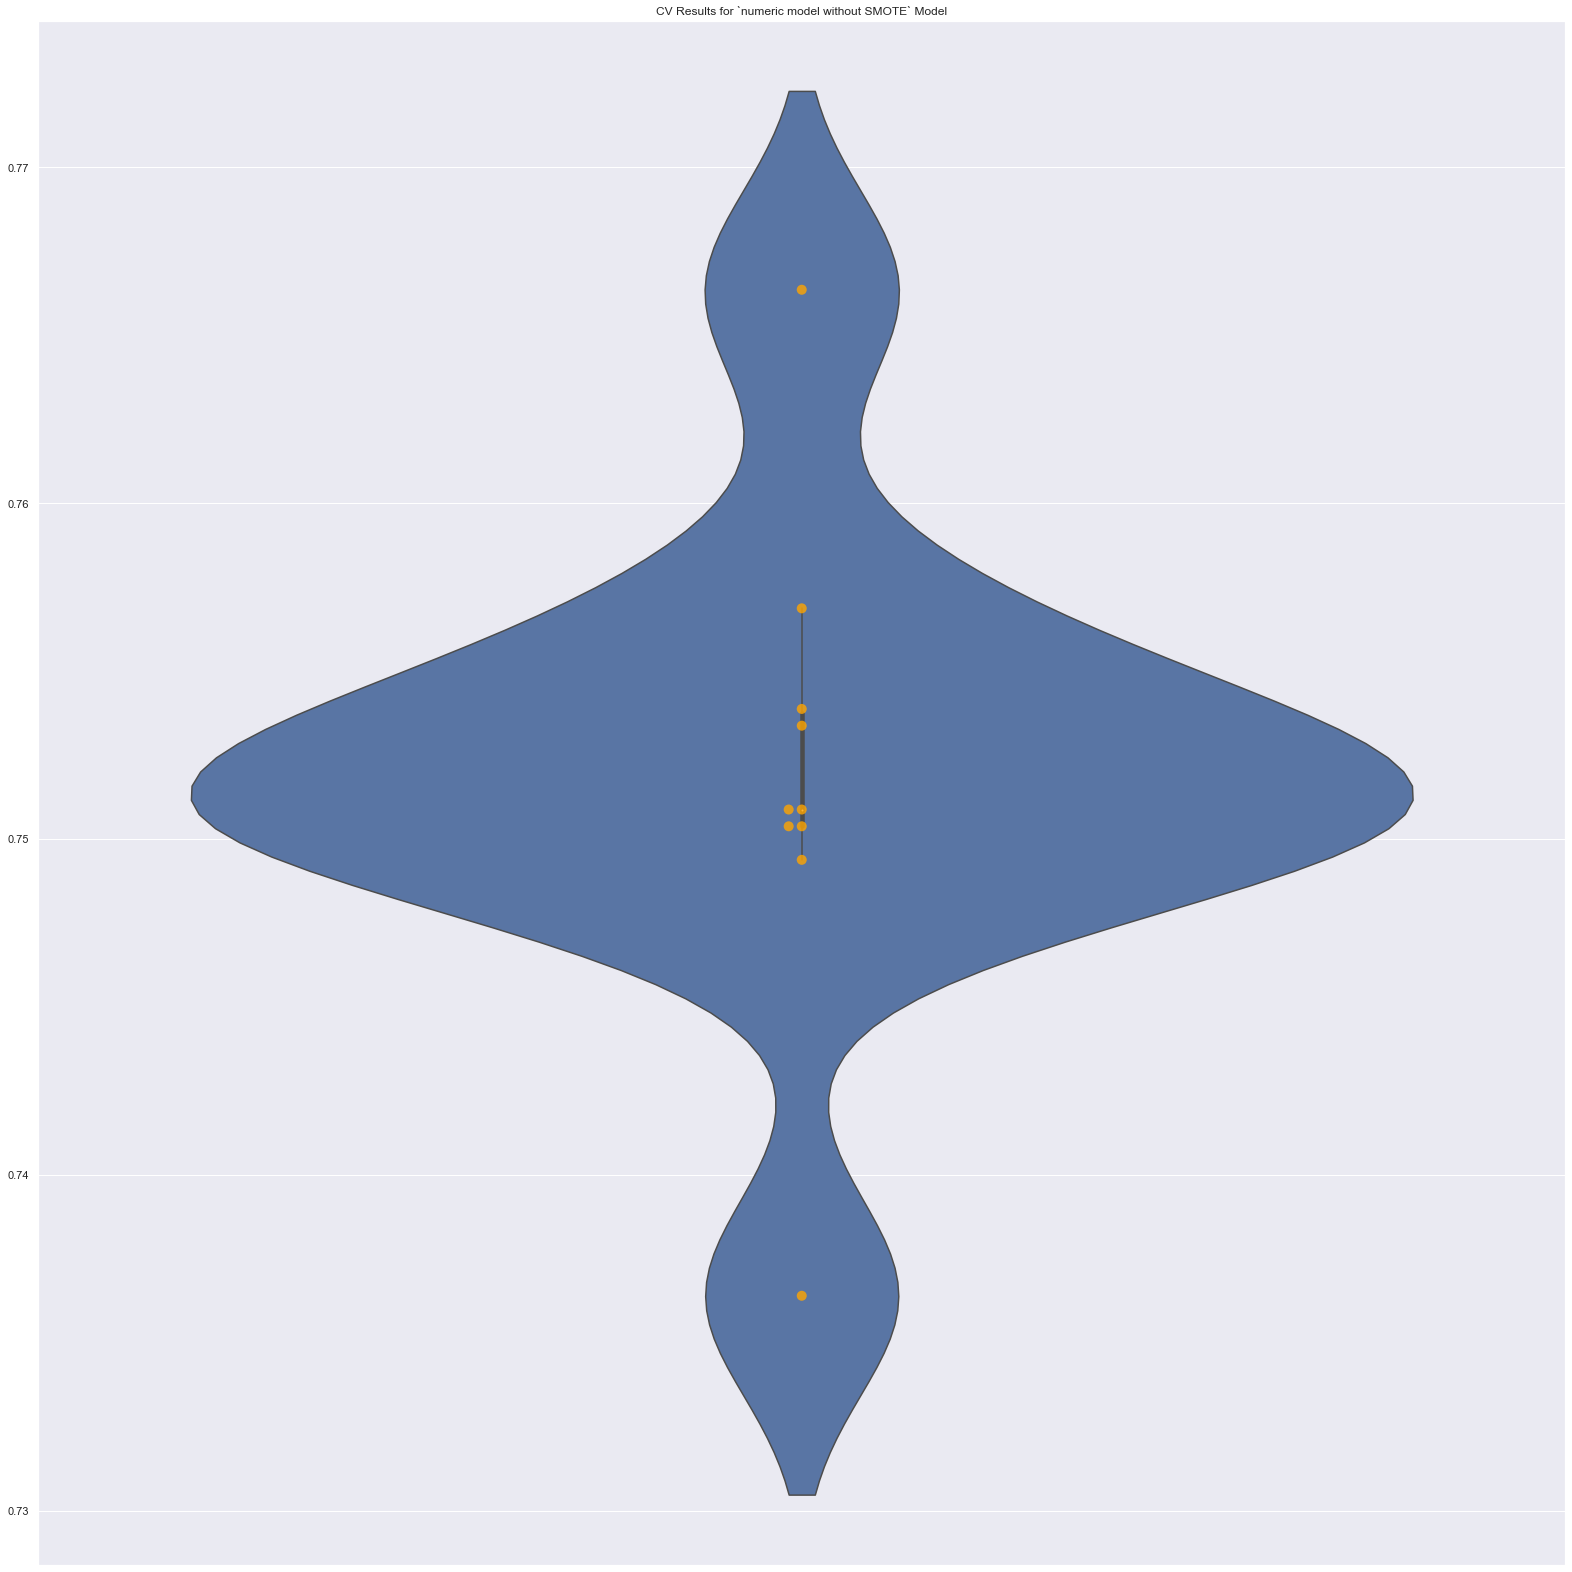

In [123]:
num_model_results = mcalculation(
                        model=rf_clf,
                        model_name='numeric model without SMOTE',
                        X=X_train_scaled, 
                        y=y_train
);
num_model_results.print_cv_summary()



#Decision tree model accuracy score and precision score
fig, ax = plt.subplots()

ax = num_model_results.plot_cv(ax)
plt.tight_layout();


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20],
}

rf_model = RandomForestClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

#Evaluate on the test set
y_pred = grid_search.predict(X_test_scaled)
#accuracy = accuracy_score(y_test, y_pred)
#print("Test set accuracy: {:.2f}".format(accuracy))

Best parameters found:  {'max_depth': 10}
Best cross-validated accuracy: 0.83


In [125]:
#New model 

rf_clf_t = DecisionTreeClassifier(max_depth=10,random_state=42)
rf_clf_t.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)


AUC for Test Set is: 0.77

AUC for Train Set is: 0.88


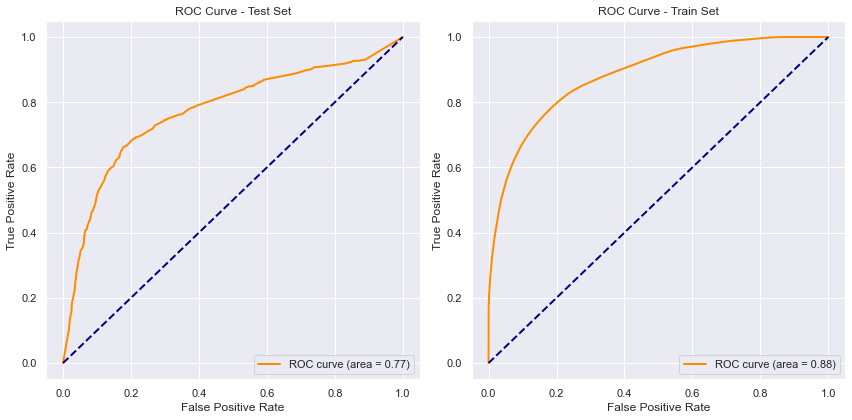


Confusion Matrix
----------------
Predicted     0     1   All
True                       
0          4841   419  5260
1           794   623  1417
All        5635  1042  6677


In [126]:
evaluate_model_performance(rf_clf_t, X_train_scaled, y_train, X_test_scaled, y_test)

In [127]:
rf_clf_t_c = cross_val_score(rf_clf_t,X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
rf_clf_t_c

0.8163754368447329

CV Results for `xxxx` model:
            0.81667 ± 0.00555 accuracy
            0.59812 ± 0.00000 precision
        


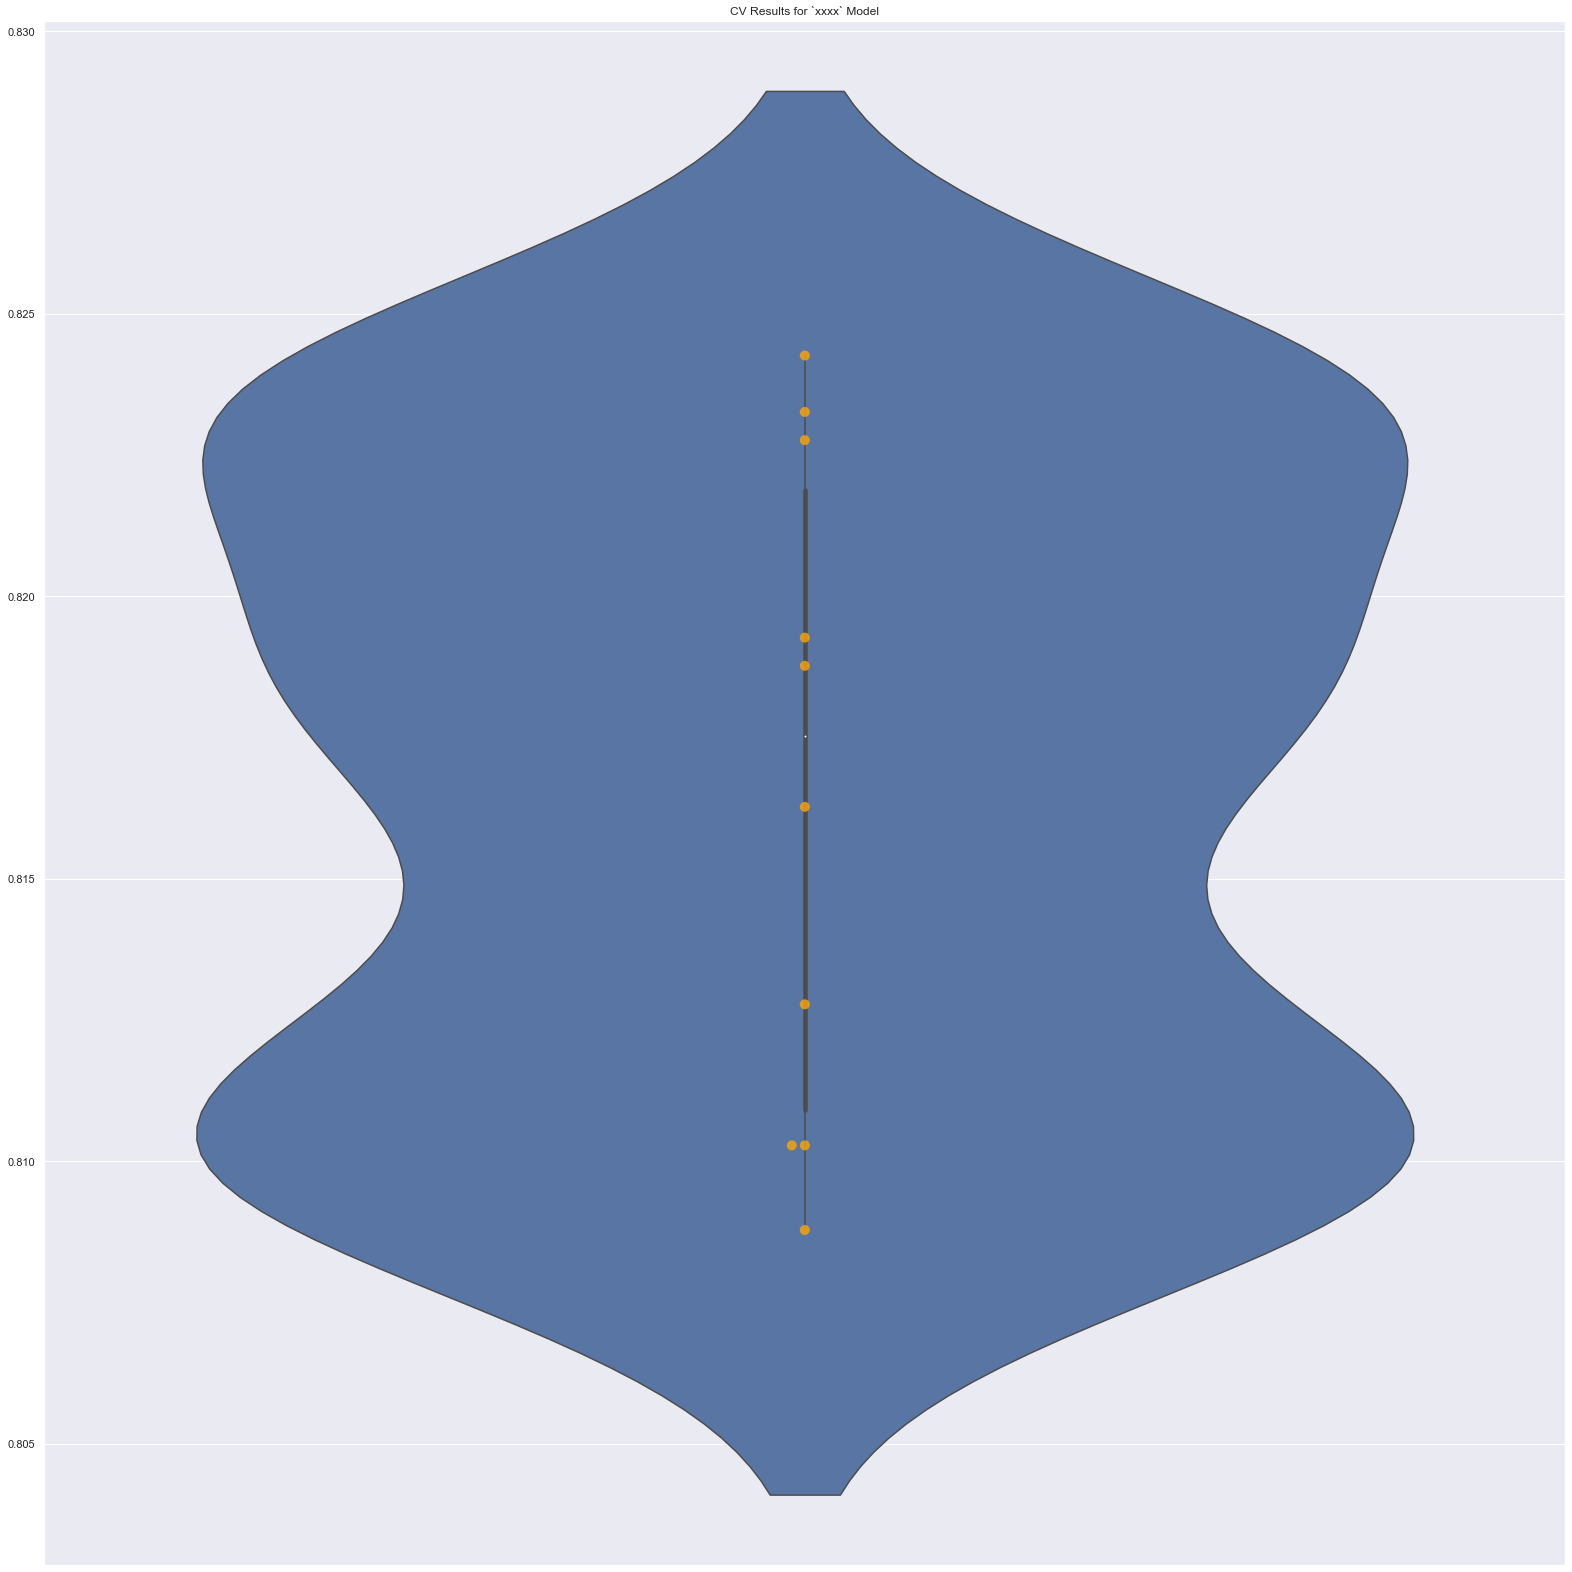

In [128]:
num_model_results = mcalculation(
                        model=rf_clf_t,
                        model_name='xxxx',
                        X=X_train_scaled, 
                        y=y_train
);
num_model_results.print_cv_summary()



#Decision tree model accuracy score and precision score
fig, ax = plt.subplots()

ax = num_model_results.plot_cv(ax)
plt.tight_layout();

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}

rf_model = RandomForestClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

#Evaluate on the test set
y_pred = grid_search.predict(X_test_scaled)
#accuracy = accuracy_score(y_test, y_pred)
#print("Test set accuracy: {:.2f}".format(accuracy))

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validated accuracy: 0.83


# ------- Logistic Regression


In [129]:
logreg =LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [130]:
y_pred= logreg.predict(X_train_scaled)

CV Results for `numeric Logreg model without SMOTE` model:
            0.83190 ± 0.00426 accuracy
            0.67410 ± 0.00000 precision
        


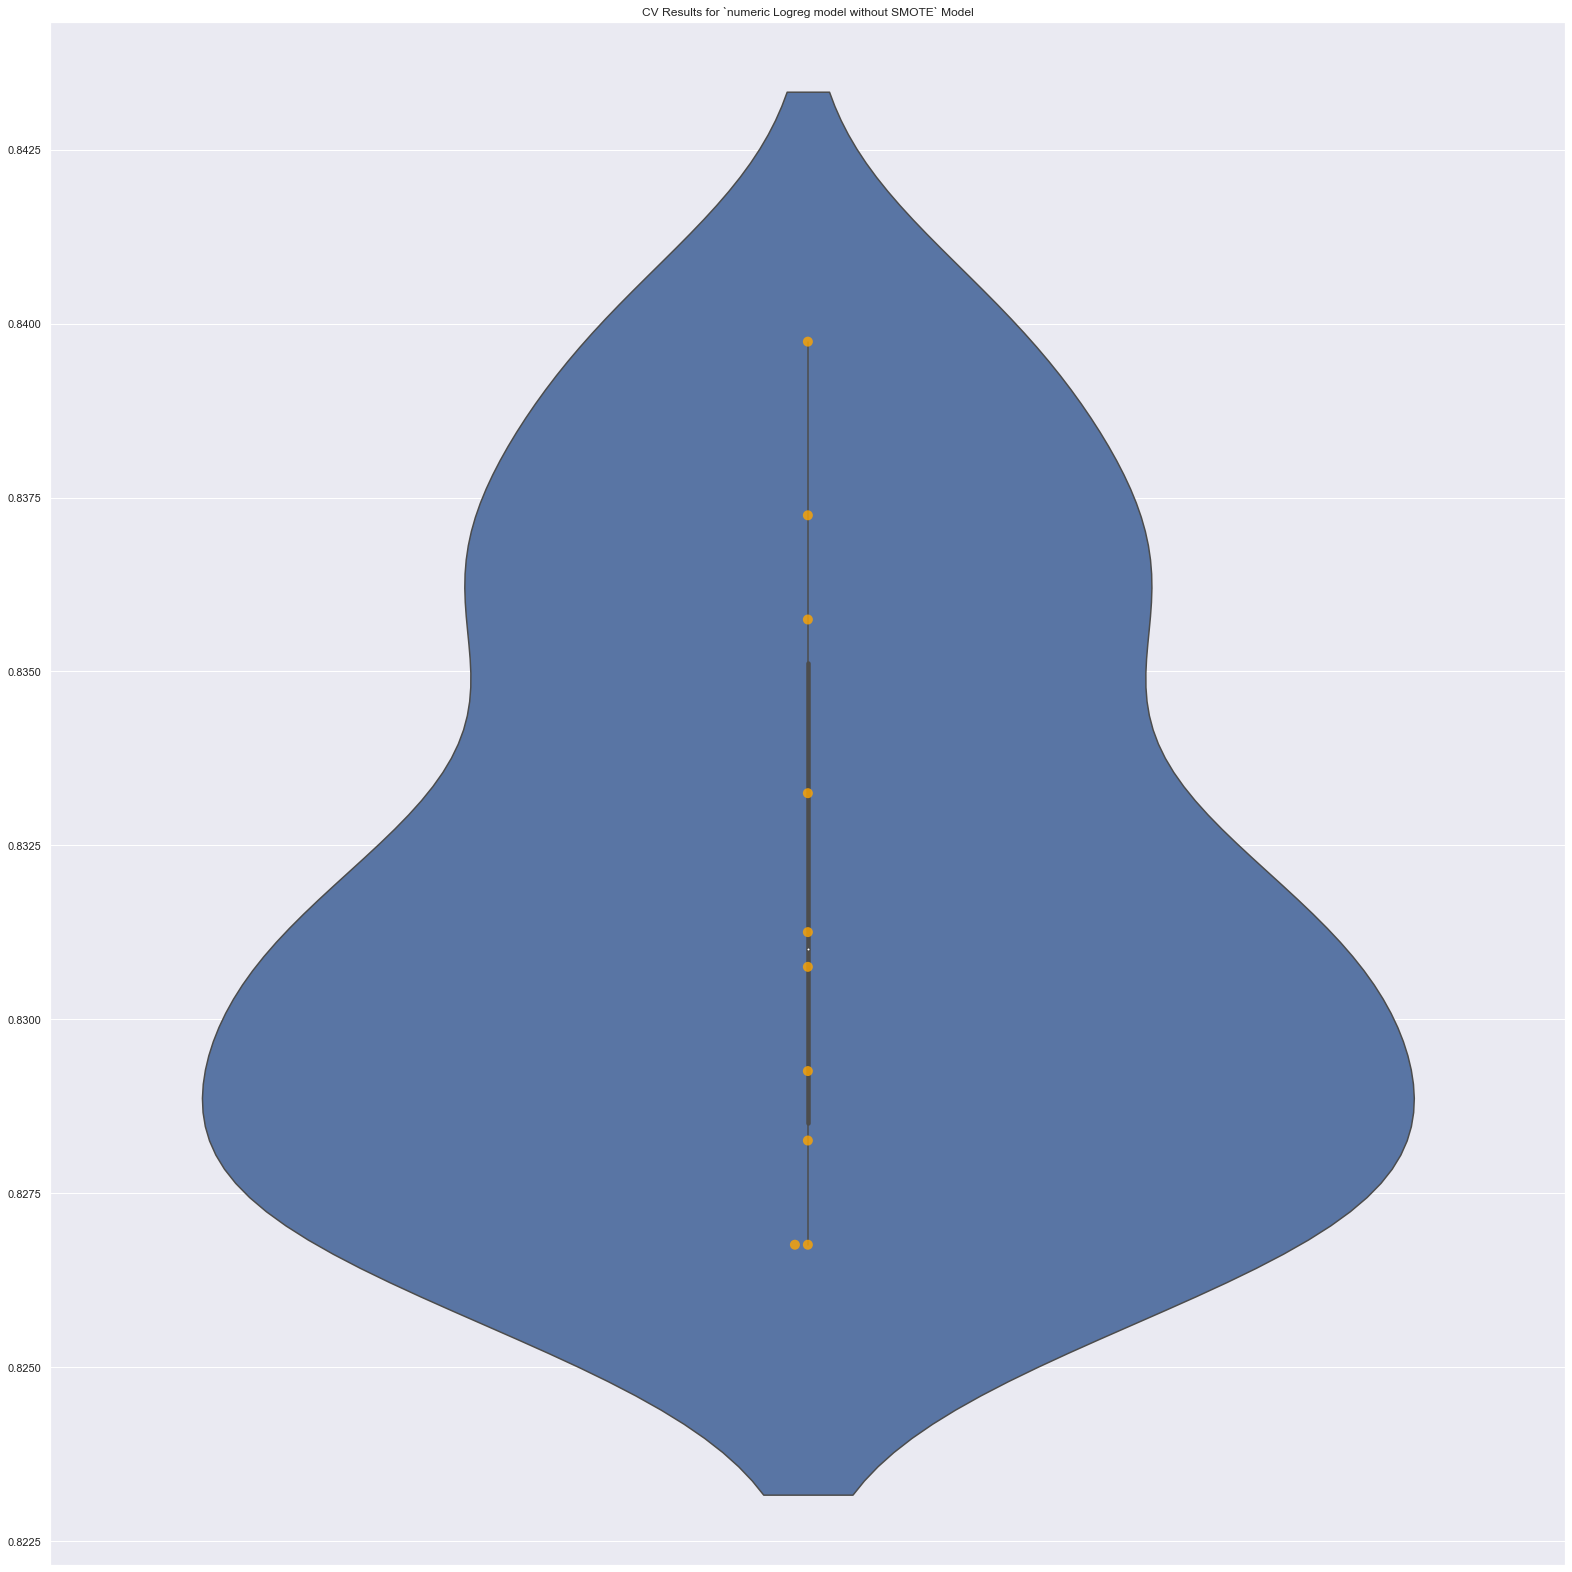

In [131]:
mum_logreg_model_results = mcalculation(
                        model=logreg,
                        model_name='numeric Logreg model without SMOTE',
                        X=X_train_scaled, 
                        y=y_train
);
mum_logreg_model_results.print_cv_summary()



# Logistic Regression model accuracy score and precision score
fig, ax = plt.subplots()

ax = mum_logreg_model_results.plot_cv(ax)
plt.tight_layout();

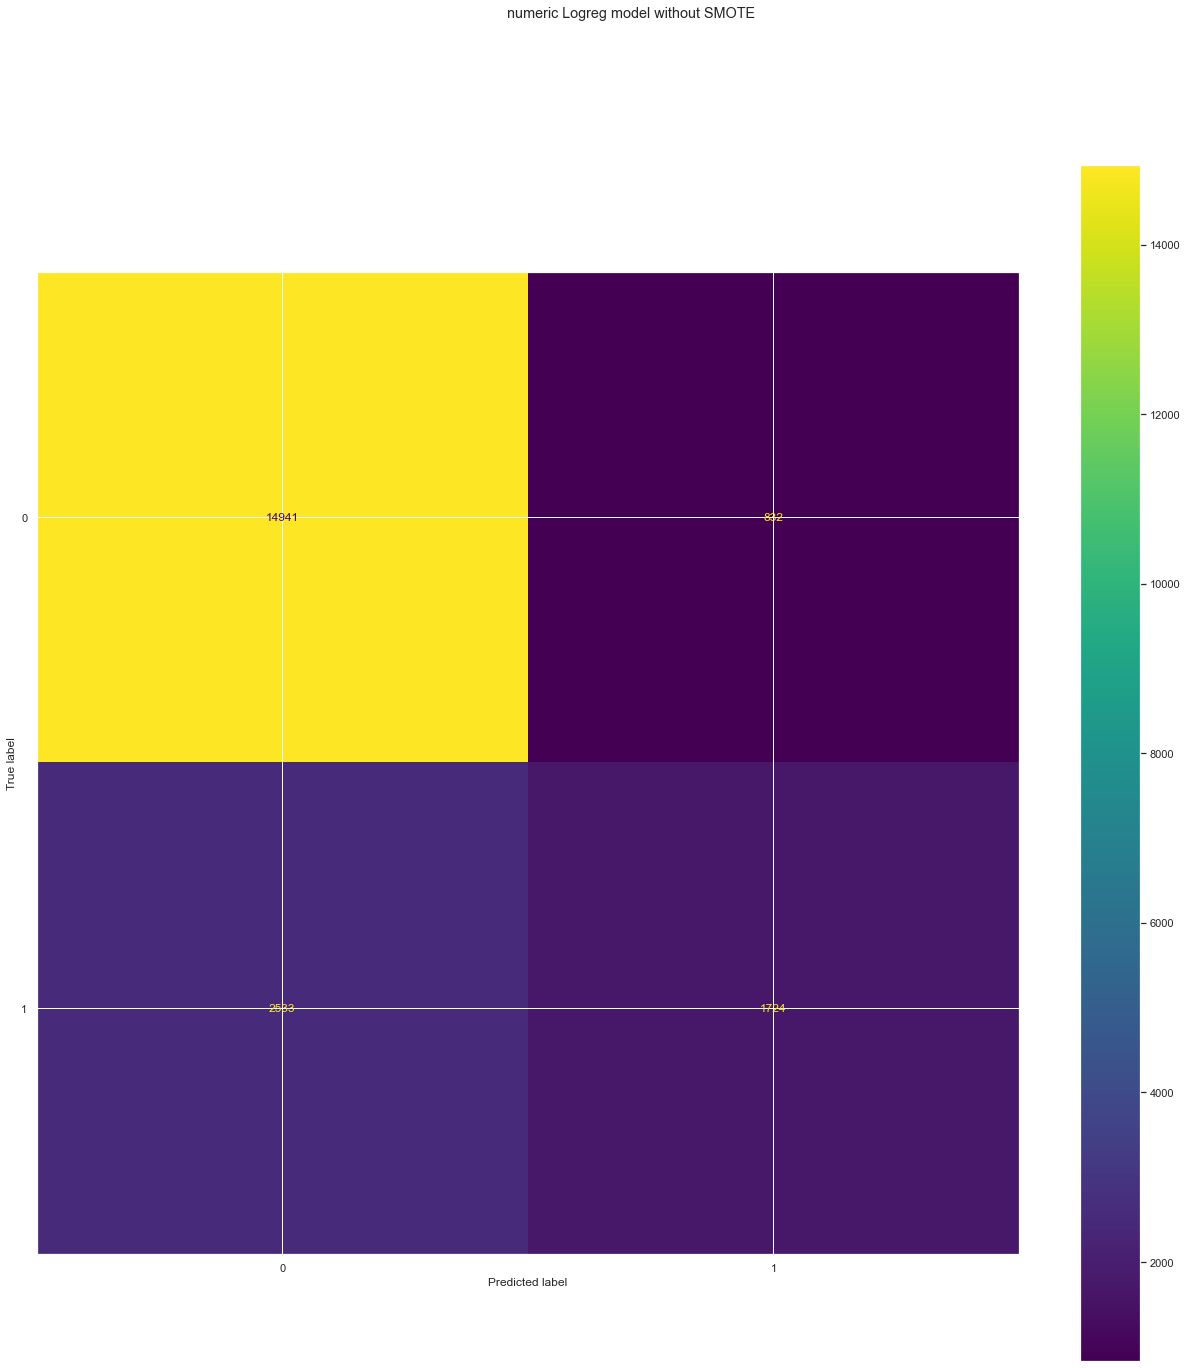

In [132]:
fig, ax = plt.subplots()

fig.suptitle("numeric Logreg model without SMOTE")

ConfusionMatrixDisplay(confusion_matrix(y_train, logreg.predict(X_train_scaled))).plot(ax=ax);


AUC for Test Set is: 0.83

AUC for Train Set is: 0.83


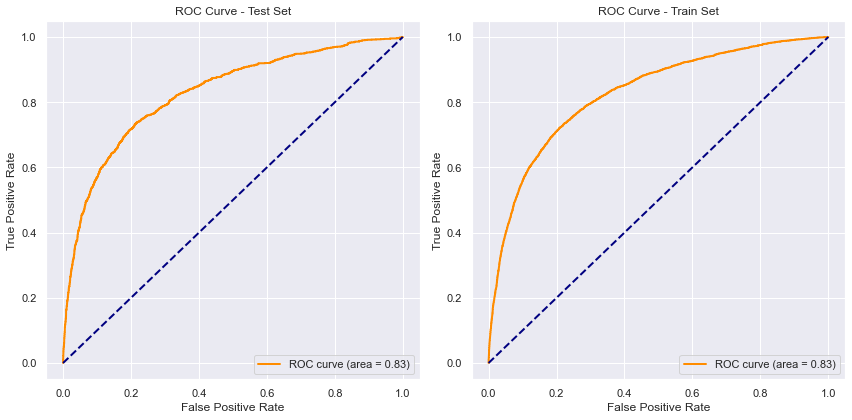


Confusion Matrix
----------------
Predicted     0    1   All
True                      
0          5018  242  5260
1           838  579  1417
All        5856  821  6677


In [133]:
evaluate_model_performance(logreg, X_train_scaled, y_train, X_test_scaled, y_test)

## Model With numerical features only using SMOTE- Decision tree- Logistic Regression

In [134]:
X.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

In [135]:
smote_df= (pd.concat([X, y], axis=1)).dropna()

In [136]:
smote_df.isnull().sum().sum()

0

In [137]:
smote_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13506 entries, 0 to 26706
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 13506 non-null  float64
 1   h1n1_knowledge               13506 non-null  float64
 2   behavioral_antiviral_meds    13506 non-null  float64
 3   behavioral_avoidance         13506 non-null  float64
 4   behavioral_face_mask         13506 non-null  float64
 5   behavioral_wash_hands        13506 non-null  float64
 6   behavioral_large_gatherings  13506 non-null  float64
 7   behavioral_outside_home      13506 non-null  float64
 8   behavioral_touch_face        13506 non-null  float64
 9   doctor_recc_h1n1             13506 non-null  float64
 10  doctor_recc_seasonal         13506 non-null  float64
 11  chronic_med_condition        13506 non-null  float64
 12  child_under_6_months         13506 non-null  float64
 13  health_worker   

In [138]:
#determine X_sm and y_sm 
X_sm= smote_df.drop('h1n1_vaccine', axis=1)
y_sm = smote_df['h1n1_vaccine']


In [139]:
#sanity check 
y_sm.value_counts()

0    9475
1    4031
Name: h1n1_vaccine, dtype: int64

In [140]:
# Performing the split test
X_tr_samp, X_te_samp, y_tr_samp, y_te_samp = train_test_split(
    X_sm, y_sm, test_size=.25, random_state=42)

In [141]:
#Scaling the the data
scaler = StandardScaler()
scaler.fit(X_tr_samp)
X_tr_sc = scaler.transform(X_tr_samp)
X_te_sc = scaler.transform(X_te_samp)


In [142]:
from imblearn.over_sampling import SMOTE
# Instantiate our SMOTE
sm = SMOTE(random_state=42)
# Fit and resample on the training data! X_tr_samp, y_tr_samp
X_tr_smote, y_tr_smote = sm.fit_resample(X_tr_sc, y_tr_samp)

In [143]:
#sanity check 
y_tr_smote.value_counts()

1    7069
0    7069
Name: h1n1_vaccine, dtype: int64

In [ ]:
"
'n_estimators': [50, 100, 200],
'max_depth': [5, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
"
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20],
}

rf_model = RandomForestClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

#Evaluate on the test set
y_pred = grid_search.predict(X_test_scaled)
#accuracy = accuracy_score(y_test, y_pred)
#print("Test set accuracy: {:.2f}".format(accuracy))



# ------ Decision Tree

In [144]:
#instantiation 
rf_clf_sm = DecisionTreeClassifier(random_state=42)
#fitting the model 
rf_clf_sm.fit(X_tr_smote, y_tr_smote)

DecisionTreeClassifier(random_state=42)

In [145]:
from sklearn.preprocessing import LabelEncoder

# Make predictions on the training data
y_pred_train_sm = rf_clf_sm.predict(X_tr_smote)

# If your labels are strings, you may need to encode them into numerical values
label_encoder = LabelEncoder()
y_tr_smote_encoded = label_encoder.fit_transform(y_tr_smote)
y_pred_train_sm_encoded = label_encoder.transform(y_pred_train_sm)

# Calculate precision
precision_train_sm = precision_score(y_tr_smote_encoded, y_pred_train_sm_encoded, average='binary') 
# If you have a multi-class classification, you might want to use average='weighted' or 'micro' or 'macro' as appropriate

print("Precision on Training Set:", precision_train_sm)

Precision on Training Set: 0.9998578131665008


In [146]:
rf_clf_sm_model_results = mcalculation(
                        model=rf_clf_sm,
                        model_name='numeric Logreg model without SMOTE',
                        X=X_tr_smote, 
                        y=y_tr_smote
);
rf_clf_sm_model_results.print_cv_summary()

CV Results for `numeric Logreg model without SMOTE` model:
            0.79751 ± 0.08676 accuracy
            0.79520 ± 0.00000 precision
        


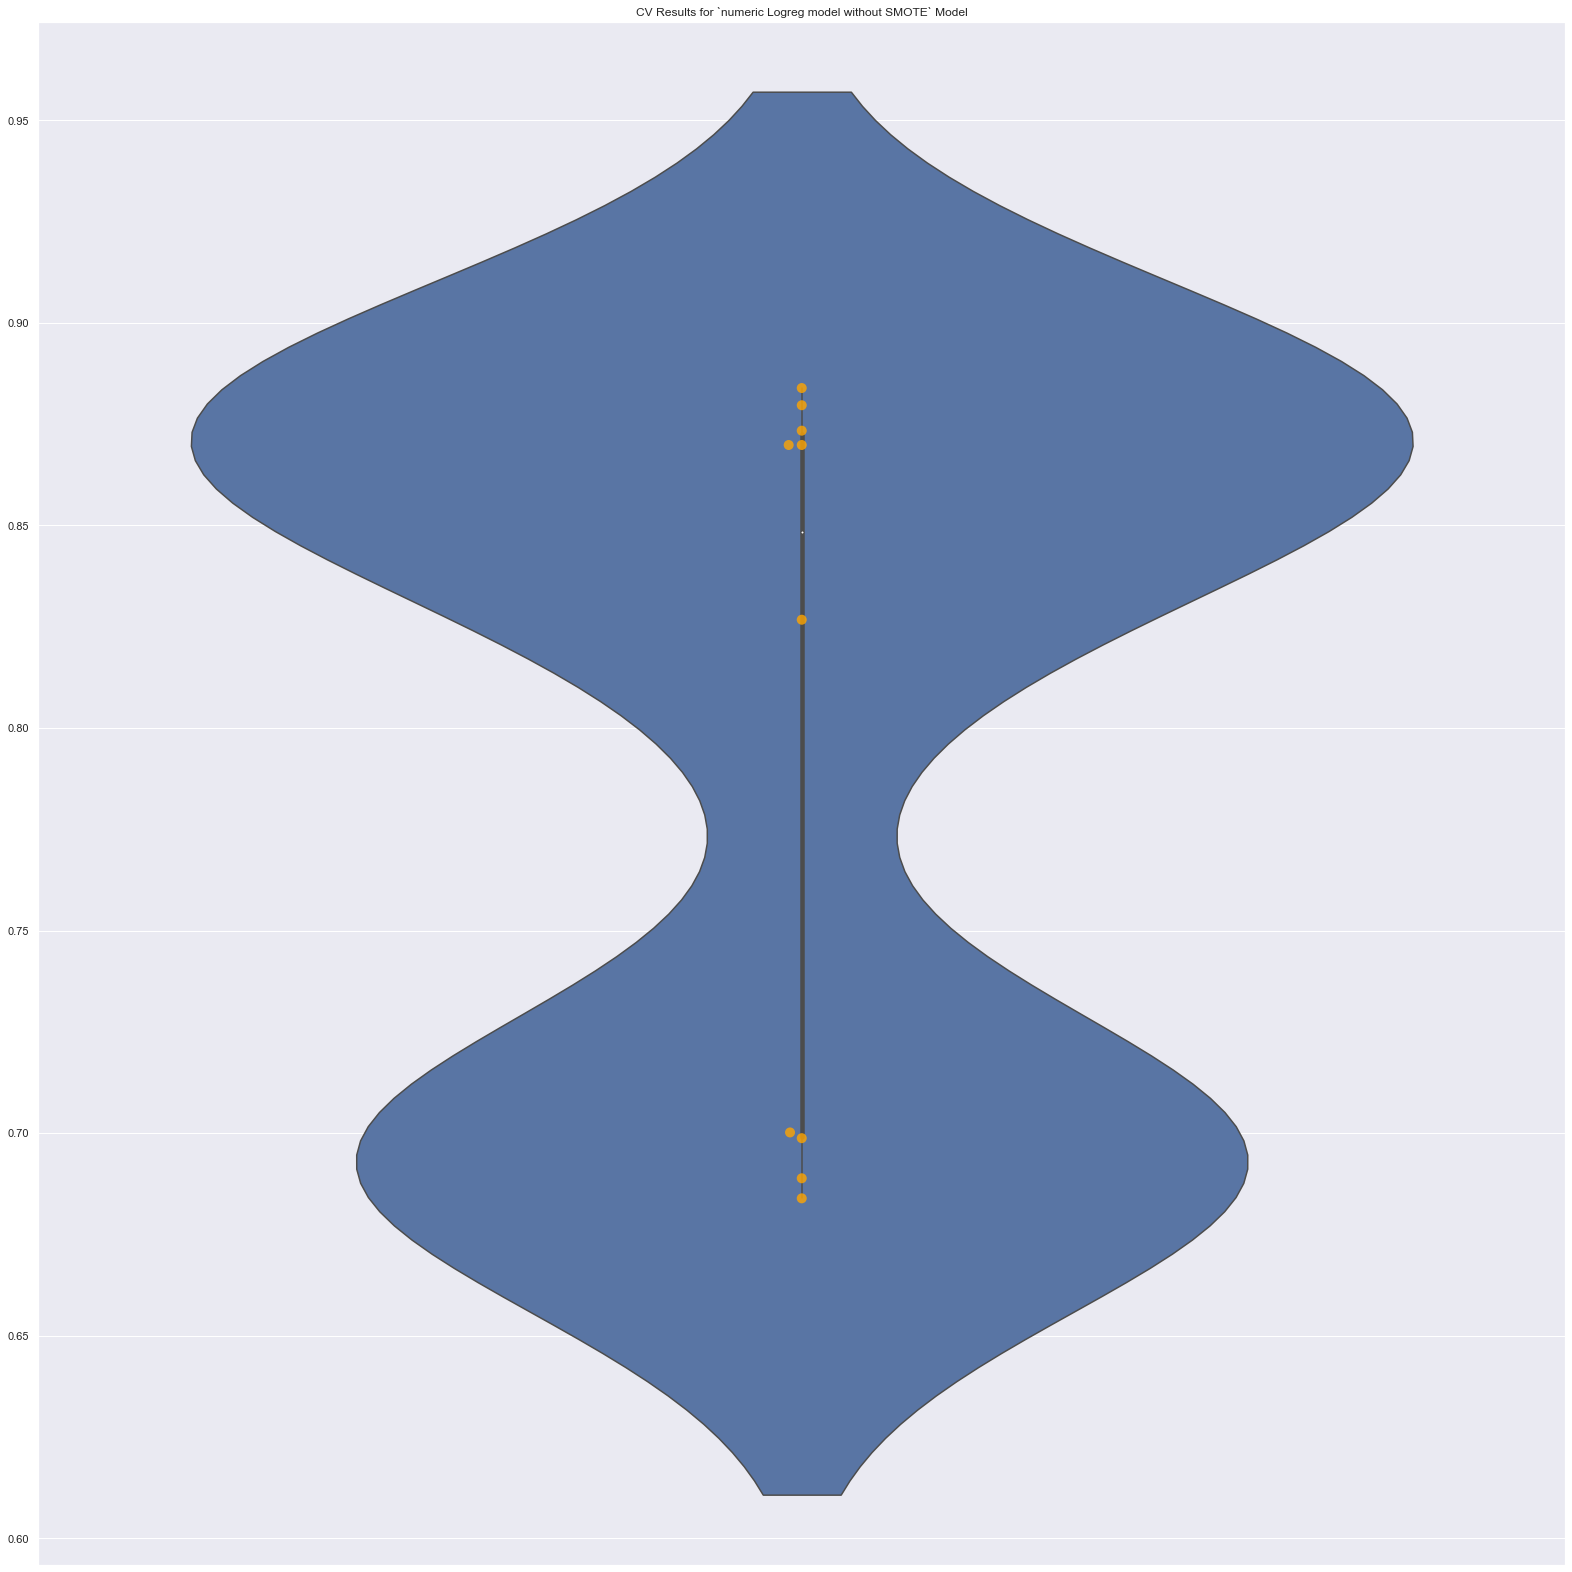

In [147]:
#Decision tree model accuracy score and precision score
fig, ax = plt.subplots()

ax = rf_clf_sm_model_results.plot_cv(ax)
plt.tight_layout();


AUC for Test Set is: 0.49

AUC for Train Set is: 1.00


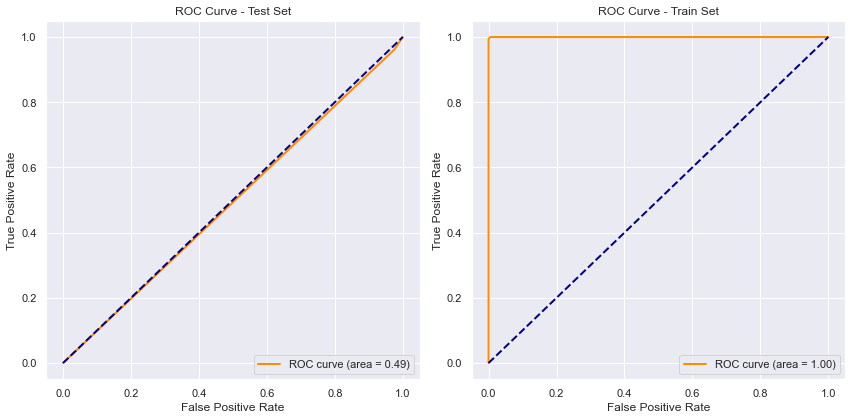


Confusion Matrix
----------------
Predicted   0     1   All
True                     
0          61  2345  2406
1          38   933   971
All        99  3278  3377


In [148]:
evaluate_model_performance(rf_clf_sm, X_tr_smote, y_tr_smote, X_te_samp, y_te_samp)

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20],
}

rf_clf_sm = RandomForestClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Best parameters
print("Best parameters found: ", grid_search.bestparams)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.bestscore))

#Evaluate on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy))

/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/DonJuve/anaconda3/en

/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/DonJuve/anaconda3/en

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# ------ Logistic Regression

In [ ]:
# Train a logistic regresssion model with the train data
logreg_sm = LogisticRegression(random_state=42)
logreg_sm.fit(X_tr_smote, y_tr_smote)

In [ ]:
logreg_sm.score(X_tr_smote, y_tr_smote)

In [ ]:
#model Accuracy
logreg_sm.score(X_te_sc, y_te_samp)

# Make predictions on the training data
y_pred_train_logistic = smote_model.predict(X_tr_smote)

# If your labels are strings, you may need to encode them into numerical values
label_encoder = LabelEncoder()
y_tr_smote_encoded = label_encoder.fit_transform(y_tr_smote)
y_pred_train_logistic_encoded = label_encoder.transform(y_pred_train_logistic)

# Calculate precision
precision_train_logistic = precision_score(y_tr_smote_encoded, y_pred_train_logistic_encoded, average='binary') 
# 

print("Precision on Training Set (Logistic Regression):", precision_train_logistic)

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_tr_smote, logreg_sm.predict(X_tr_smote))

# Plot the Confusion Matrix 
fig, ax = plt.subplots(figsize=(4, 4))  
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_sm.classes_).plot(ax=ax)

# Show the plot
plt.show()

In [ ]:

# Create the confusion matrix
cm_test = confusion_matrix(y_te_samp, logreg_sm.predict(X_te_sc))

# Plot the Confusion Matrix with a smaller size
fig, ax = plt.subplots(figsize=(4, 4))  
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=logreg_sm.classes_).plot(ax=ax)

# Show the plot
plt.show()

In [ ]:
logreg_sm_model_results = mcalculation(
                        model=logreg_sm,
                        model_name='numeric Logreg model with SMOTE',
                        X=X_tr_smote, 
                        y=y_tr_smote
);
rf_clf_sm_model_results.print_cv_summary()


In [ ]:

evaluate_model_performance(logreg_sm, X_tr_smote, y_tr_smote, X_te_sc, y_te_samp)